# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations, cramers_v, correlation_ratio, theils_u

## Read Data

In [2]:
ori = pd.read_csv('bank-additional-full.csv', delimiter=';')
ori

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Make Dataframe

In [3]:
df = ori.copy(deep=True)

## Checking Data

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Checking statistic information from numeric columns

In [7]:
df_num = df.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'])
df_num.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Describe Data (null, unique, and unique sample)

In [8]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(1).values
    ])
    
pd.DataFrame(dataDesc, columns=[
    "Data Features",
    "Data Types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,age,int64,0,0.0,78,[74]
1,job,object,0,0.0,12,[unknown]
2,marital,object,0,0.0,4,[single]
3,education,object,0,0.0,8,[university.degree]
4,default,object,0,0.0,3,[unknown]
5,housing,object,0,0.0,3,[yes]
6,loan,object,0,0.0,3,[yes]
7,contact,object,0,0.0,2,[cellular]
8,month,object,0,0.0,10,[may]
9,day_of_week,object,0,0.0,5,[thu]


### Outliers Checking

In [9]:
Desc_outliers = []
hitung = 0

for i in df_num:
    Q1 = df.describe()[i]['25%']
    Q3 = df.describe()[i]['75%']
    IQR = Q3 - Q1
    upper_fence = Q3 + (1.5*IQR)
    lower_fence = Q1 - (1.5*IQR)
    hitung = 0
    temp = []
    for j in df[i]:
        if (j < lower_fence) | (j > upper_fence) :
            hitung+=1
            temp.append(j)
    Desc_outliers.append([
        i,
        hitung,
    ])

pd.DataFrame(Desc_outliers, columns=[
    "Data Features",
    "Jumlah Outliers"
])

,Data Features,Jumlah Outliers
0,age,469
1,duration,2963
2,campaign,2406
3,pdays,1515
4,previous,5625
5,emp.var.rate,0
6,cons.price.idx,0
7,cons.conf.idx,447
8,euribor3m,0
9,nr.employed,0


### Checking Value Counts of Data

In [10]:
df['y'].value_counts()/len(df)*100

no     88.734583
yes    11.265417
Name: y, dtype: float64

### Data Correlation and Association

In [11]:
df_num.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [12]:
df_cat = df.drop(columns=df_num.columns)

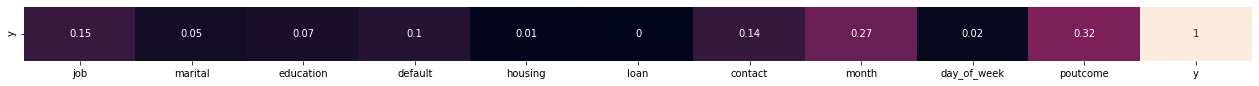

In [13]:
assoc_cramers = []
for i in df_cat.columns:
    assoc = round(cramers_v(df['y'], df_cat[i]), 2)
    assoc_cramers.append(assoc)

data_cramers = pd.DataFrame(data = [assoc_cramers], columns = df_cat.columns, index = ['y'])

plt.figure(figsize=(22, 1))
sns.heatmap(data_cramers, annot=True, cbar=False)
plt.show()

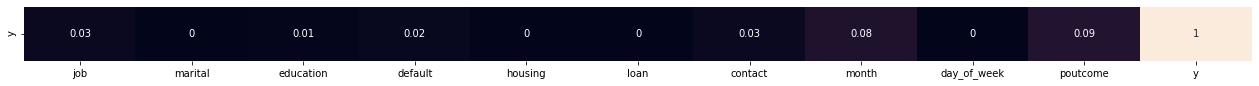

In [14]:
assoc_theils = []
for i in df_cat.columns:
    assoc = round(theils_u(df['y'], df_cat[i]), 2)
    assoc_theils.append(assoc)

data_theils = pd.DataFrame(data = [assoc_theils], columns = df_cat.columns, index = ['y'])

plt.figure(figsize=(22, 1))
sns.heatmap(data_theils, annot=True, cbar=False)
plt.show()

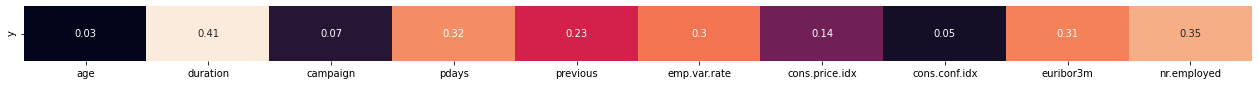

In [15]:
corr_rat = []
for i in df_num.columns:
    a = round(correlation_ratio(df['y'], df_num[i]), 2)
    corr_rat.append(a)

data_corr_rat = pd.DataFrame(data = [corr_rat], columns = df_num.columns, index = ['y'])

plt.figure(figsize=(22, 1))
sns.heatmap(data_corr_rat, annot=True, cbar=False)
plt.show()

In [16]:
df.education = df.education.apply(lambda x : x.replace(".", " "))
df_cat.education = df.education.apply(lambda x : x.replace(".", " "))
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic 6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Univariate Analysis

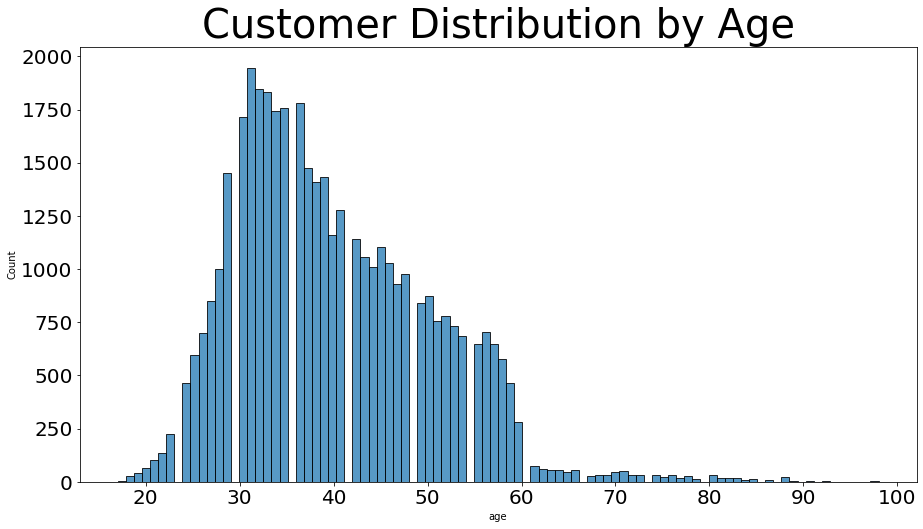

In [33]:
plt.figure(figsize=(15,8))
sns.histplot(x=df['age'])
plt.title("Customer Distribution by Age", size=40)
plt.xticks(size=20)
plt.yticks(size=20)
# plt.savefig('age.png', bbox_inches='tight')
plt.show()

### Age Category Grouping

In [19]:
age_bin = [0, 10, 20, 40, df['age'].max()]
labels = ['Kids', 'Teenager', 'Adult', 'Elder']
df['age_bin'] = pd.cut(df['age'], bins=age_bin, labels=labels)

In [20]:
age = pd.crosstab(index = df["age_bin"], columns = 'Sum')
age['Persentase'] = ''
persen = []
for a in age["Sum"]:
    persen.append(a/age['Sum'].sum()*100)
age['Persentase'] = persen
age

col_0,Sum,Persentase
age_bin,,
Teenager,140,0.339905
Adult,23628,57.366223
Elder,17420,42.293872


In [46]:
age.reset_index()[age.reset_index()['Sum'] == a].index[0]

2

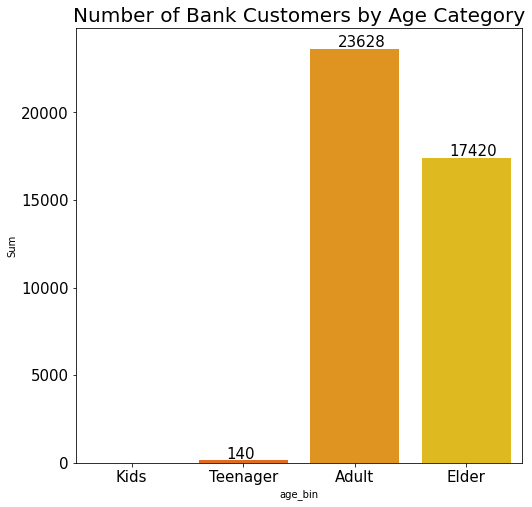

In [59]:
plt.figure(figsize=(8,8))
sns.barplot(data = age.reset_index(), x='age_bin', y='Sum', palette='autumn')
plt.title("Number of Bank Customers by Age Category", size=20)
plt.xticks(size=15)
plt.yticks(size=15)
for b in age.reset_index()['Sum']:
    plt.text(age.reset_index()[age.reset_index()['Sum'] == b].index[0]+0.85, b+100, b, fontdict={'color' : 'black', 'size' : 15})
# plt.savefig('agebin.png', bbox_inches='tight')
plt.show()

In [25]:
job = pd.crosstab(index = df["job"], columns = 'Sum')
job['Persentase'] = ''
persen = []
for a in job["Sum"]:
    persen.append(a/job['Sum'].sum()*100)
job['Persentase'] = persen
job = job.sort_values(by='Sum', ascending=False)
job

col_0,Sum,Persentase
job,,
admin.,10422,25.303486
blue-collar,9254,22.467709
technician,6743,16.371273
services,3969,9.636302
management,2924,7.099155
retired,1720,4.175974
entrepreneur,1456,3.535010
self-employed,1421,3.450034
housemaid,1060,2.573565


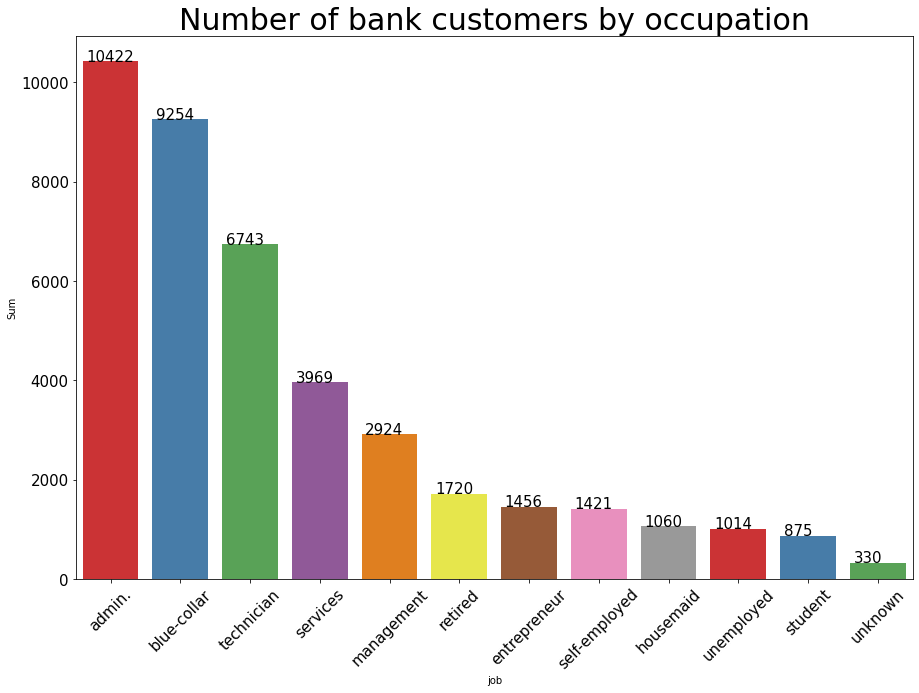

In [67]:
plt.figure(figsize=(15,10))
sns.barplot(data= job.reset_index(), x='job', y='Sum', palette='Set1', order=job.reset_index()['job'])
plt.title("Number of bank customers by occupation", size=30)
plt.xticks(size=15, rotation=45)
plt.yticks(size=15)
for b in job.reset_index()['Sum']:
    plt.text(job.reset_index()[job.reset_index()['Sum'] == b].index[0]-.35, b, b, fontdict={'color' : 'black', 'size' : 15})
# plt.savefig('job.png', bbox_inches='tight')
plt.show()

In [27]:
mar = pd.crosstab(index = df["marital"], columns = 'Sum')
mar['Persentase'] = ''
persen = []
for a in mar["Sum"]:
    persen.append(a/mar['Sum'].sum()*100)
mar['Persentase'] = persen
mar

col_0,Sum,Persentase
marital,,
divorced,4612,11.197436
married,24928,60.522482
single,11568,28.085850
unknown,80,0.194231


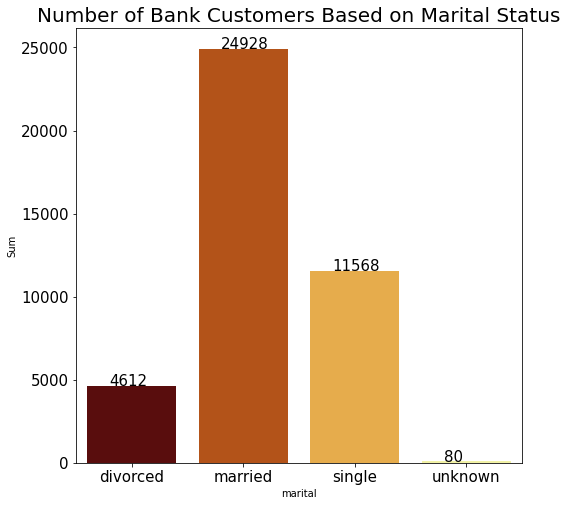

In [76]:
plt.figure(figsize=(8,8))
sns.barplot(data= mar.reset_index(), x='marital', y='Sum', palette='afmhot')
plt.title("Number of Bank Customers Based on Marital Status", size=20)
plt.xticks(size=15)
plt.yticks(size=15)
for b in mar.reset_index()['Sum']:
    plt.text(mar.reset_index()[mar.reset_index()['Sum'] == b].index[0]-.2, b, b, fontdict={'color' : 'black', 'size' : 15})
# plt.savefig('marital.png', bbox_inches='tight')
plt.show()

In [78]:
edu = pd.crosstab(index = df["education"], columns = 'Sum')
edu['Persentase'] = ''
persen = []
for a in edu["Sum"]:
    persen.append(a/edu['Sum'].sum()*100)
edu['Persentase'] = persen
edu = edu.sort_values(by='Sum', ascending=False)
edu

col_0,Sum,Persentase
education,,
university degree,12168,29.542585
high school,9515,23.101389
basic 9y,6045,14.676605
professional course,5243,12.729436
basic 4y,4176,10.138875
basic 6y,2292,5.564728
unknown,1731,4.202680
illiterate,18,0.043702


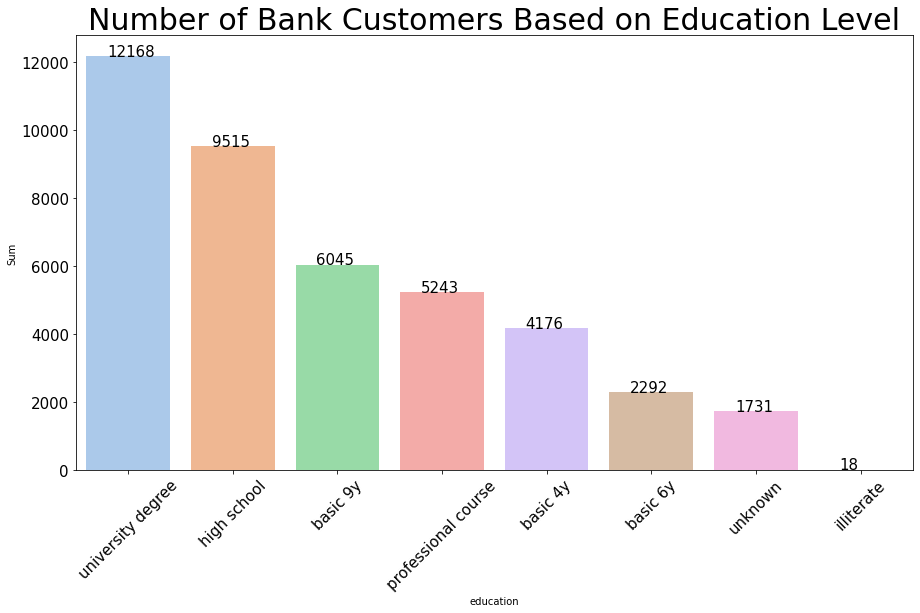

In [81]:
plt.figure(figsize=(15,8))
sns.barplot(data = edu.reset_index(), x='education', y='Sum', palette='pastel', order=edu.reset_index()['education'])
plt.title("Number of Bank Customers Based on Education Level", size=30)
plt.xticks(size=15, rotation=45)
plt.yticks(size=15)
for b in edu.reset_index()['Sum']:
    plt.text(edu.reset_index()[edu.reset_index()['Sum'] == b].index[0]-.2, b, b, fontdict={'color' : 'black', 'size' : 15})
# plt.savefig('education.png', bbox_inches='tight')
plt.show()

In [82]:
de = pd.crosstab(index = df["default"], columns = 'Sum')
de['Persentase'] = ''
persen = []
for a in de["Sum"]:
    persen.append(a/de['Sum'].sum()*100)
de['Persentase'] = persen
de

col_0,Sum,Persentase
default,,
no,32588,79.120132
unknown,8597,20.872584
yes,3,0.007284


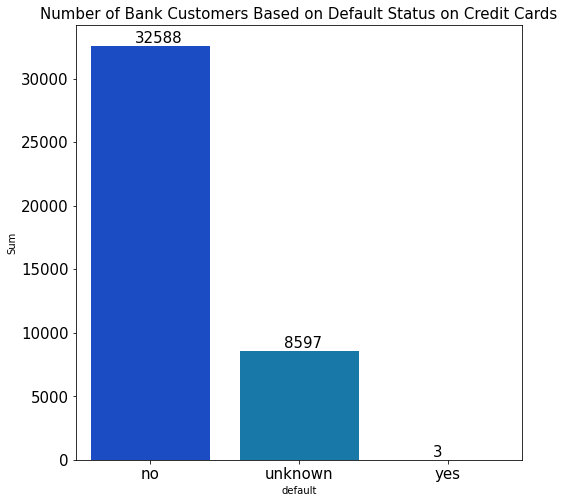

In [89]:
plt.figure(figsize=(8,8))
sns.barplot(data = de.reset_index(), x='default', y='Sum', palette='winter')
plt.title("Number of Bank Customers Based on Default Status on Credit Cards", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
for b in de.reset_index()['Sum']:
    plt.text(de.reset_index()[de.reset_index()['Sum'] == b].index[0]-.1, b+250, b, fontdict={'color' : 'black', 'size' : 15})
# plt.savefig('default.png', bbox_inches='tight')
plt.show()

In [91]:
house = pd.crosstab(index = df["housing"], columns = 'Sum')
house['Persentase'] = ''
persen = []
for a in house["Sum"]:
    persen.append(a/house['Sum'].sum()*100)
house['Persentase'] = persen
house

col_0,Sum,Persentase
housing,,
no,18622,45.212198
unknown,990,2.403613
yes,21576,52.384190


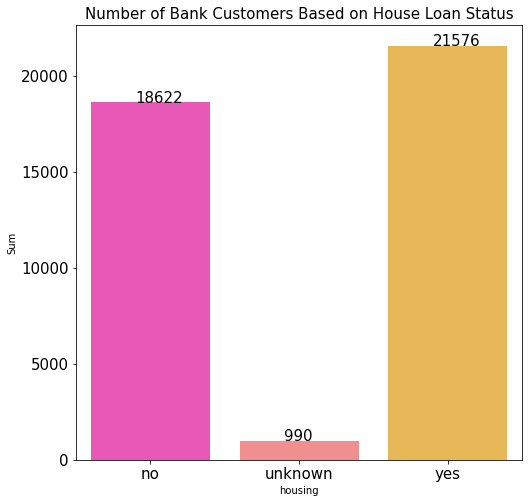

In [94]:
plt.figure(figsize=(8,8))
sns.barplot(data = house.reset_index(), x='housing', y='Sum', palette='spring')
plt.title("Number of Bank Customers Based on House Loan Status", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
for b in house.reset_index()['Sum']:
    plt.text(house.reset_index()[house.reset_index()['Sum'] == b].index[0]-.1, b, b, fontdict={'color' : 'black', 'size' : 15})
# plt.savefig('housing.png', bbox_inches='tight')
plt.show()

In [95]:
loan = pd.crosstab(index = df["loan"], columns = 'Sum')
loan['Persentase'] = ''
persen = []
for a in loan["Sum"]:
    persen.append(a/loan['Sum'].sum()*100)
loan['Persentase'] = persen
loan

col_0,Sum,Persentase
loan,,
no,33950,82.426920
unknown,990,2.403613
yes,6248,15.169467


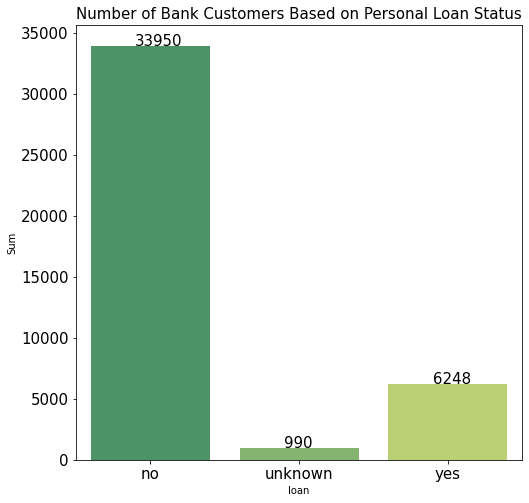

In [98]:
plt.figure(figsize=(8,8))
sns.barplot(data = loan.reset_index(), x='loan', y='Sum', palette='summer')
plt.title("Number of Bank Customers Based on Personal Loan Status", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
for b in loan.reset_index()['Sum']:
    plt.text(loan.reset_index()[loan.reset_index()['Sum'] == b].index[0]-.1, b, b, fontdict={'color' : 'black', 'size' : 15})
# plt.savefig('loan.png', bbox_inches='tight')
plt.show()

In [99]:
con = pd.crosstab(index = df["contact"], columns = 'Sum')
con['Persentase'] = ''
persen = []
for a in con["Sum"]:
    persen.append(a/con['Sum'].sum()*100)
con['Persentase'] = persen
con

col_0,Sum,Persentase
contact,,
cellular,26144,63.474798
telephone,15044,36.525202


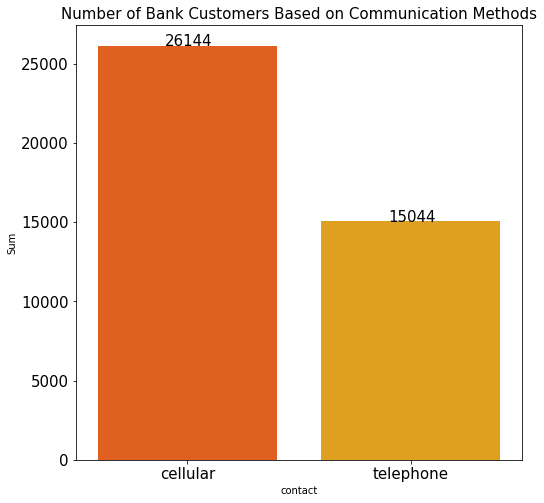

In [100]:
plt.figure(figsize=(8,8))
sns.barplot(data = con.reset_index(), x='contact', y='Sum', palette='autumn')
plt.title("Number of Bank Customers Based on Communication Methods", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
for b in con.reset_index()['Sum']:
    plt.text(con.reset_index()[con.reset_index()['Sum'] == b].index[0]-.1, b, b, fontdict={'color' : 'black', 'size' : 15})
# plt.savefig('contact.png', bbox_inches='tight')
plt.show()

In [101]:
df['month'] = pd.Categorical(df['month'], ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
mon = pd.crosstab(index = df["month"], columns = 'Sum')
mon['Persentase'] = ''
persen = []
for a in mon["Sum"]:
    persen.append(a/mon['Sum'].sum()*100)
mon['Persentase'] = persen
mon = mon.sort_values(by='Sum', ascending=False)
mon

col_0,Sum,Persentase
month,,
may,13769,33.429640
jul,7174,17.417694
aug,6178,14.999514
jun,5318,12.911528
nov,4101,9.956784
apr,2632,6.390211
oct,718,1.743226
sep,570,1.383898
mar,546,1.325629


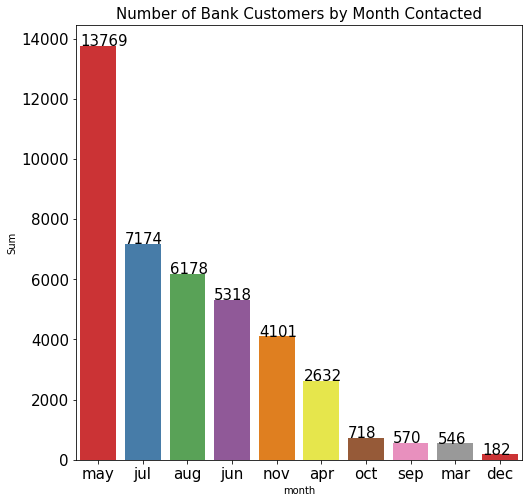

In [109]:
plt.figure(figsize=(8,8))
sns.barplot(data = mon.reset_index(), x='month', y='Sum', palette='Set1', order=mon.reset_index()['month'])
plt.title("Number of Bank Customers by Month Contacted", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
for b in mon.reset_index()['Sum']:
    plt.text(mon.reset_index()[mon.reset_index()['Sum'] == b].index[0]-.4, b, b, fontdict={'color' : 'black', 'size' : 15})
# plt.savefig('month', bbox_inches='tight')
plt.show()

In [110]:
df['day_of_week'] = pd.Categorical(df['day_of_week'], ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])
day = pd.crosstab(index = df["day_of_week"], columns = 'Sum')
day['Persentase'] = ''
persen = []
for a in day["Sum"]:
    persen.append(a/day['Sum'].sum()*100)
day['Persentase'] = persen
day

col_0,Sum,Persentase
day_of_week,,
mon,8514,20.671069
tue,8090,19.641643
wed,8134,19.748470
thu,8623,20.935709
fri,7827,19.003108


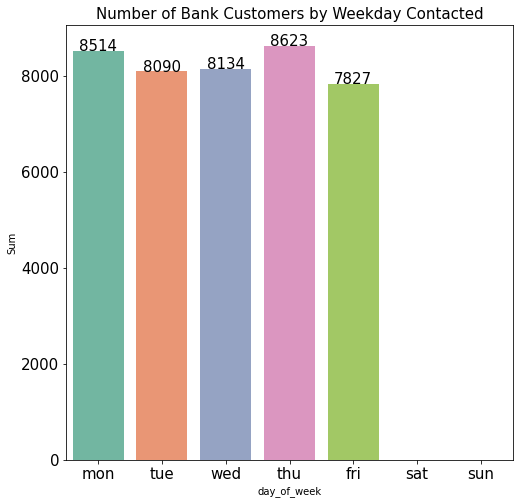

In [114]:
plt.figure(figsize=(8,8))
sns.barplot(data = day.reset_index(), x='day_of_week', y='Sum', palette='Set2')
plt.title("Number of Bank Customers by Weekday Contacted", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
for b in day.reset_index()['Sum']:
    plt.text(day.reset_index()[day.reset_index()['Sum'] == b].index[0]-.3, b, b, fontdict={'color' : 'black', 'size' : 15})
# plt.savefig('day.png', bbox_inches='tight')
plt.show()

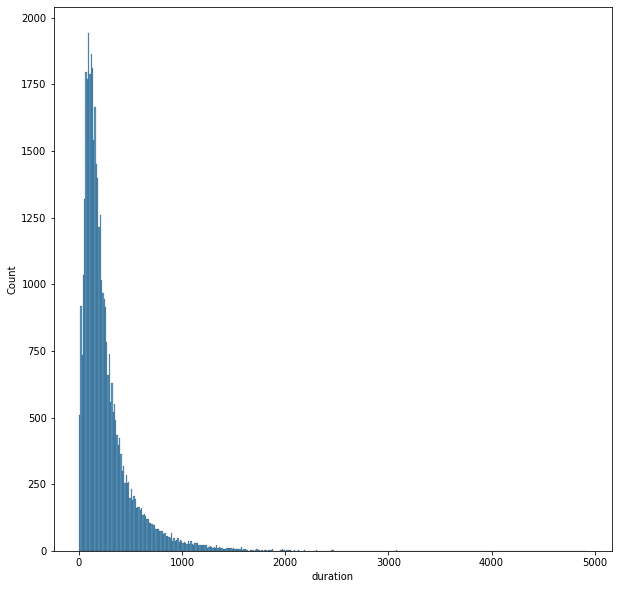

In [39]:
plt.figure(figsize=(10,10))
sns.histplot(x=df['duration'])
plt.show()

### Call duration category grouping

In [117]:
dur_bin = [-1,180,360,540,720,900,1080,df['duration'].max()]
labels_duration = ['0-3 min', '3-6 min', '6-9 min', '9-12 min', '12-15 min', '15-18 min', '>18 min']
df['dur_bin'] = pd.cut(df['duration'], bins=dur_bin, labels=labels_duration)

In [118]:
dur = pd.crosstab(index = df["dur_bin"], columns = 'Sum')
dur['Persentase'] = ''
persen = []
for a in dur["Sum"]:
    persen.append(a/dur['Sum'].sum()*100)
dur['Persentase'] = persen
dur

col_0,Sum,Persentase
dur_bin,,
0-3 min,20705,50.269496
3-6 min,11963,29.044867
6-9 min,4246,10.308828
9-12 min,1985,4.819365
12-15 min,1008,2.447315
15-18 min,527,1.279499
>18 min,754,1.830630


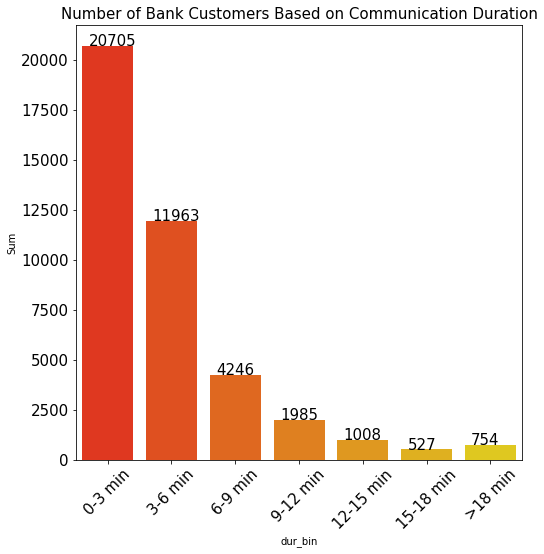

In [121]:
plt.figure(figsize=(8,8))
sns.barplot(data = dur.reset_index(), x='dur_bin', y='Sum', palette='autumn')
plt.title("Number of Bank Customers Based on Communication Duration", size=15)
plt.xticks(size=15, rotation=45)
plt.yticks(size=15)
for b in dur.reset_index()['Sum']:
    plt.text(dur.reset_index()[dur.reset_index()['Sum'] == b].index[0]-.3, b, b, fontdict={'color' : 'black', 'size' : 15})
# plt.savefig('durbin.png', bbox_inches='tight')
plt.show()

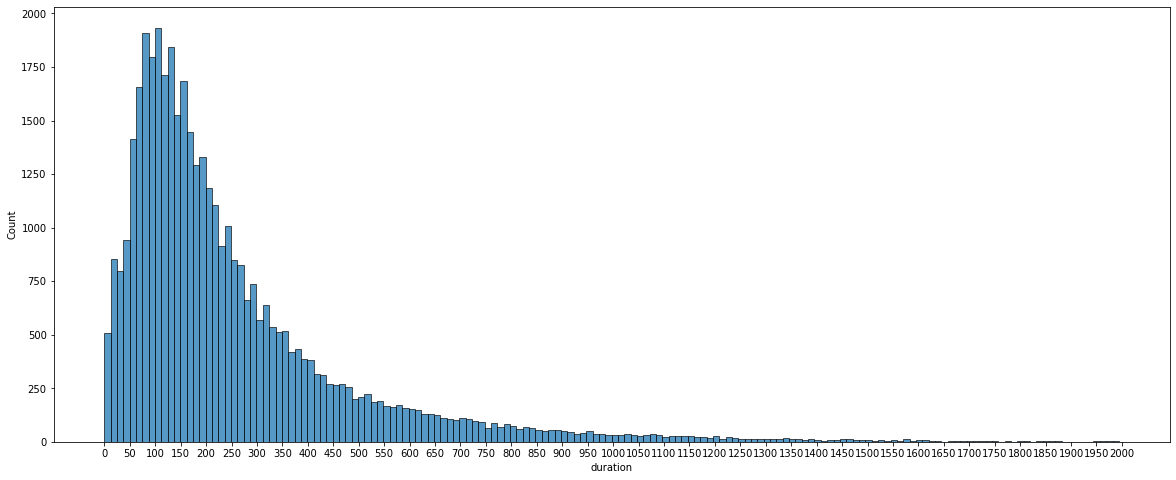

In [43]:
plt.figure(figsize=(20,8))
sns.histplot(x=df[df['duration'] <= 2000]['duration'])
plt.xticks(np.arange(0,2001,50), rotation=45)
plt.show()

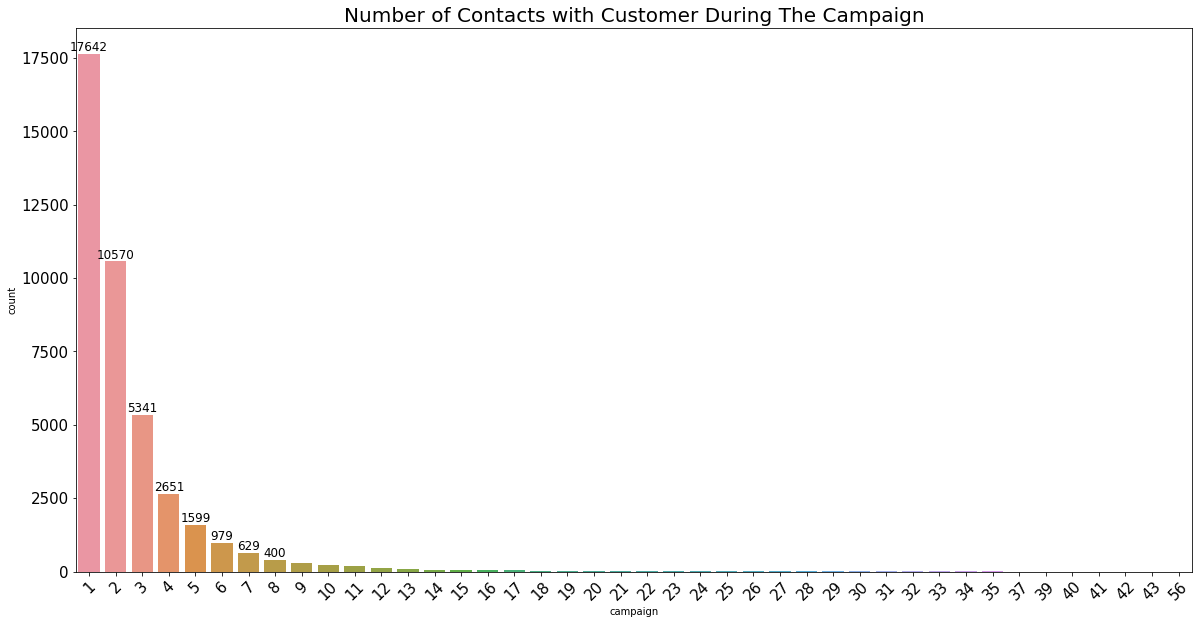

In [134]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=df, x='campaign')
plt.title('Number of Contacts with Customer During The Campaign', size=20)
plt.xticks(size=15, rotation=45)
plt.yticks(size=15)
z = 0
for p in ax.patches:
    z += 1
    if z <= 8:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate(int(y), (x.mean(), y), ha='center', va='bottom', size=12)
        
# plt.savefig('campaign.png', bbox_inches='tight')
plt.show()

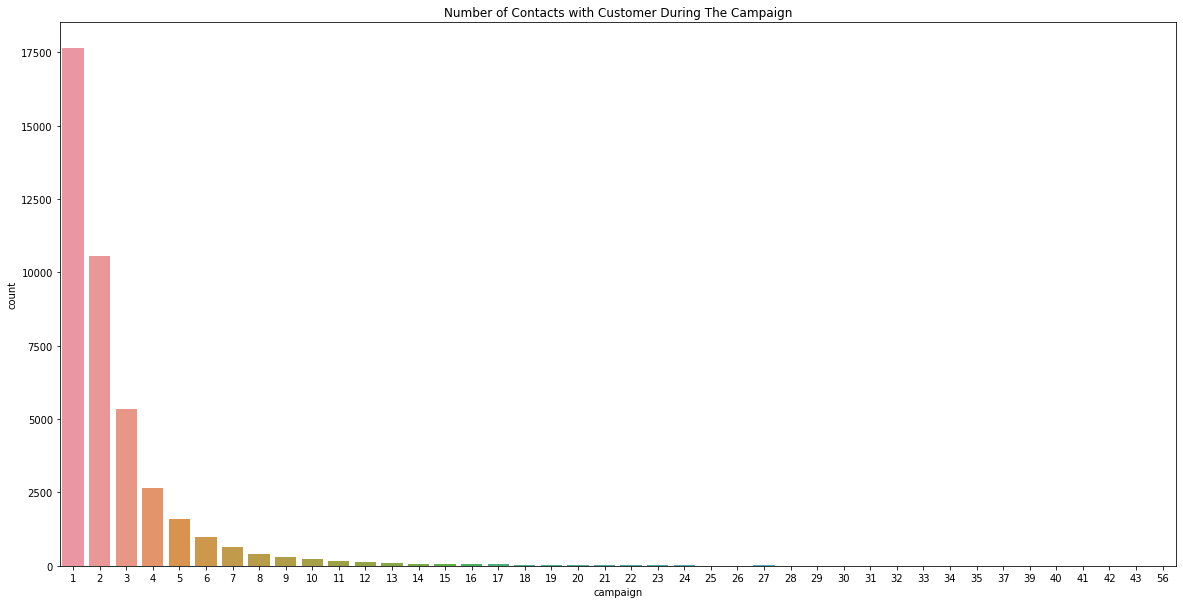

In [44]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='campaign')
plt.title('Number of Contacts with Customer During The Campaign', size=20)

# plt.savefig('campaign.png')
plt.show()

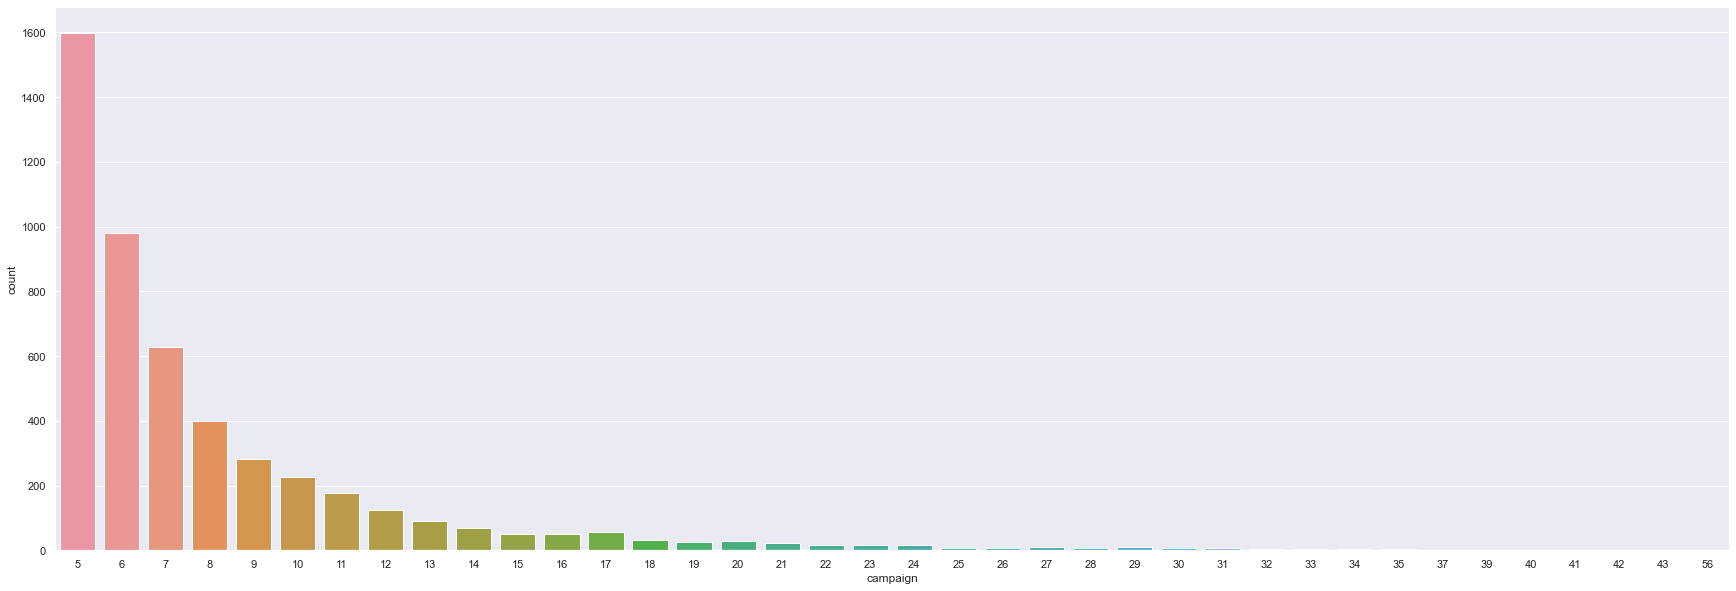

In [45]:
plt.figure(figsize=(30,10))
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x=df[df['campaign']>4]['campaign'])

plt.show()

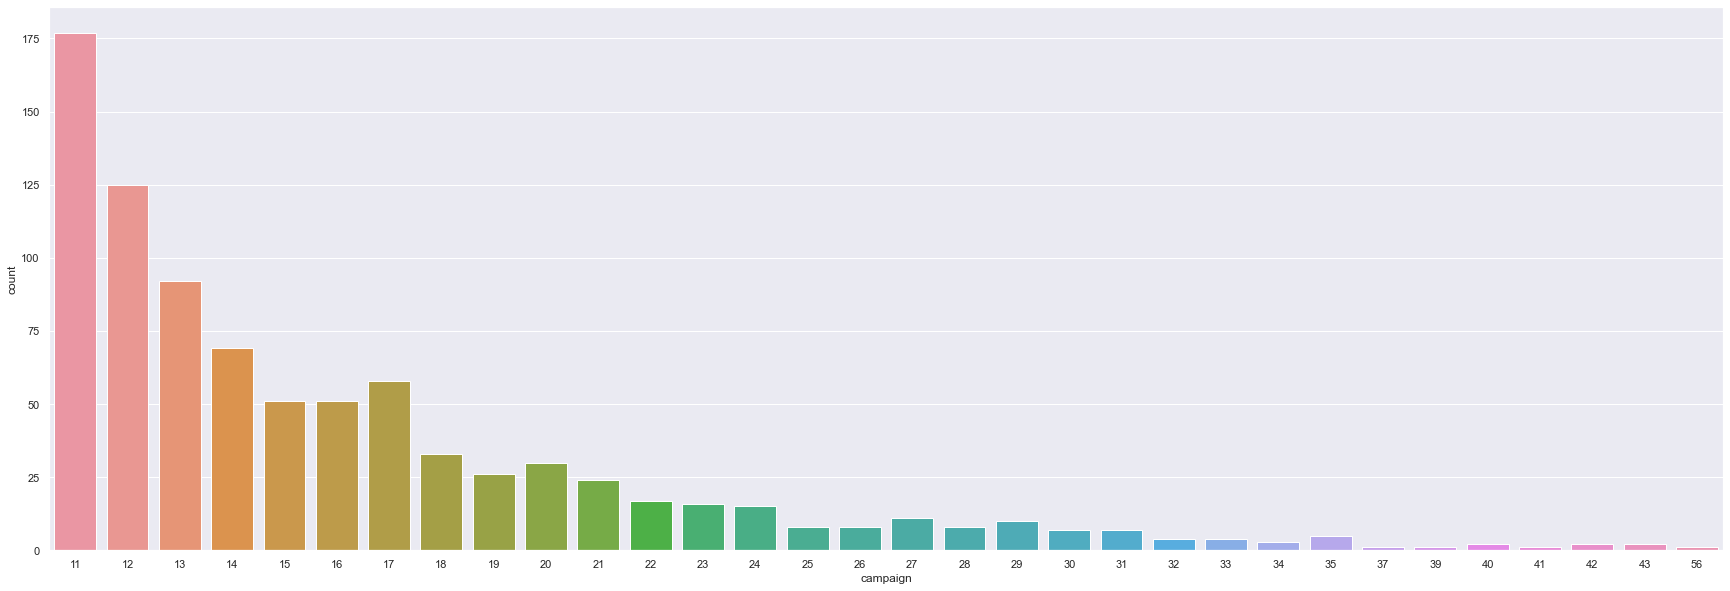

In [46]:
plt.figure(figsize=(30,10))
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x=df[df['campaign']>10]['campaign'])

plt.show()

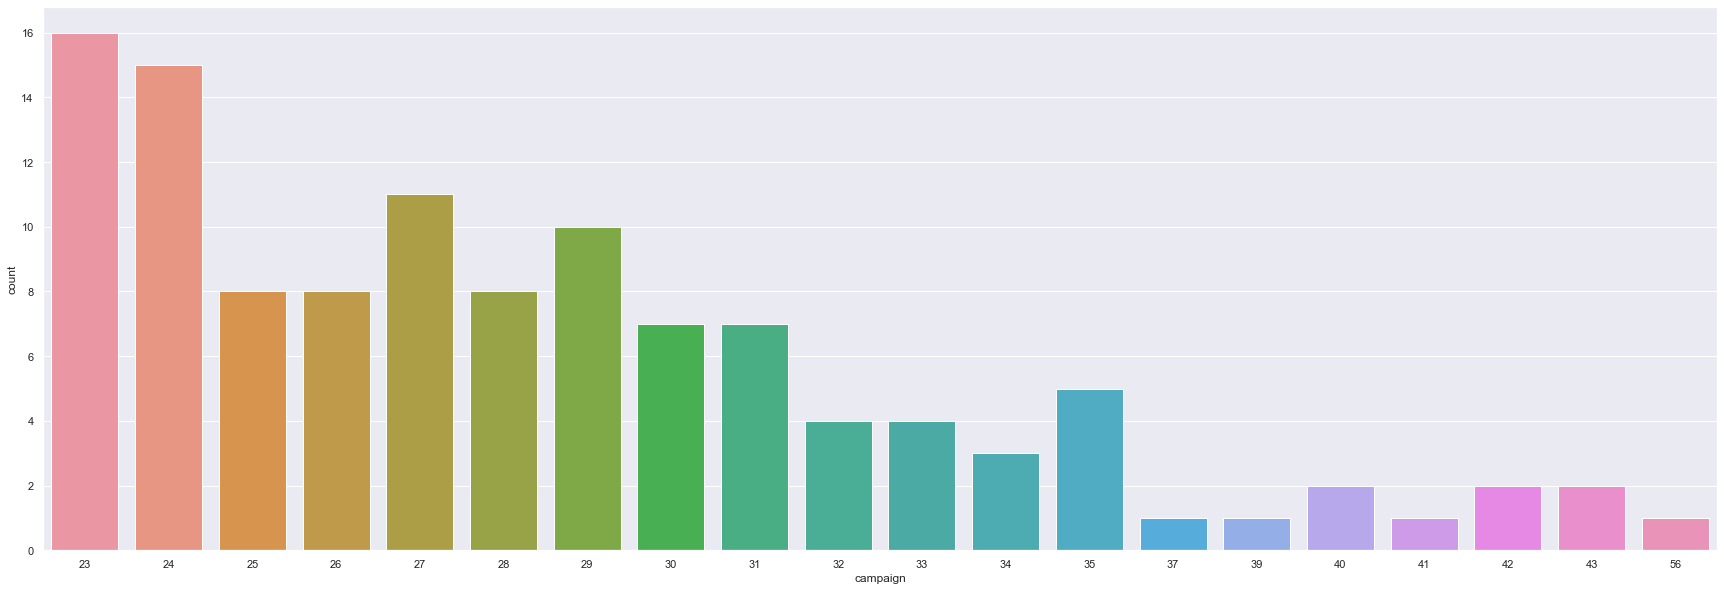

In [47]:
plt.figure(figsize=(30,10))
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x=df[df['campaign']>22]['campaign'])

plt.show()

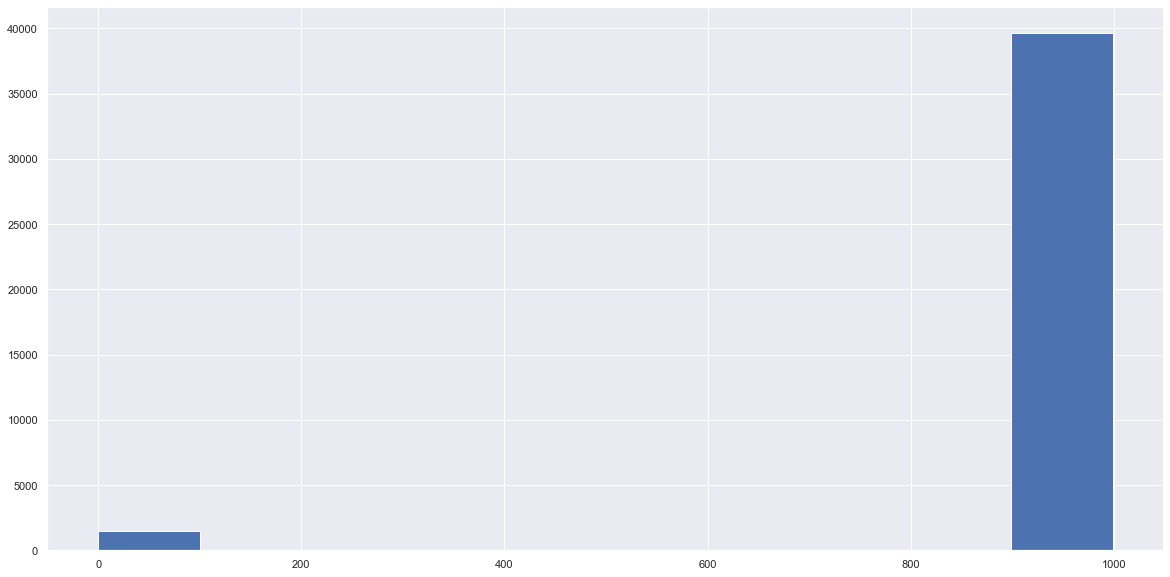

In [48]:
plt.figure(figsize=(20,10))
plt.hist(x=df['pdays'])
# sns.set(rc={'figure.figsize':(20,10)})
# sns.countplot(x=df[df['campaign']>22]['campaign'])

plt.show()

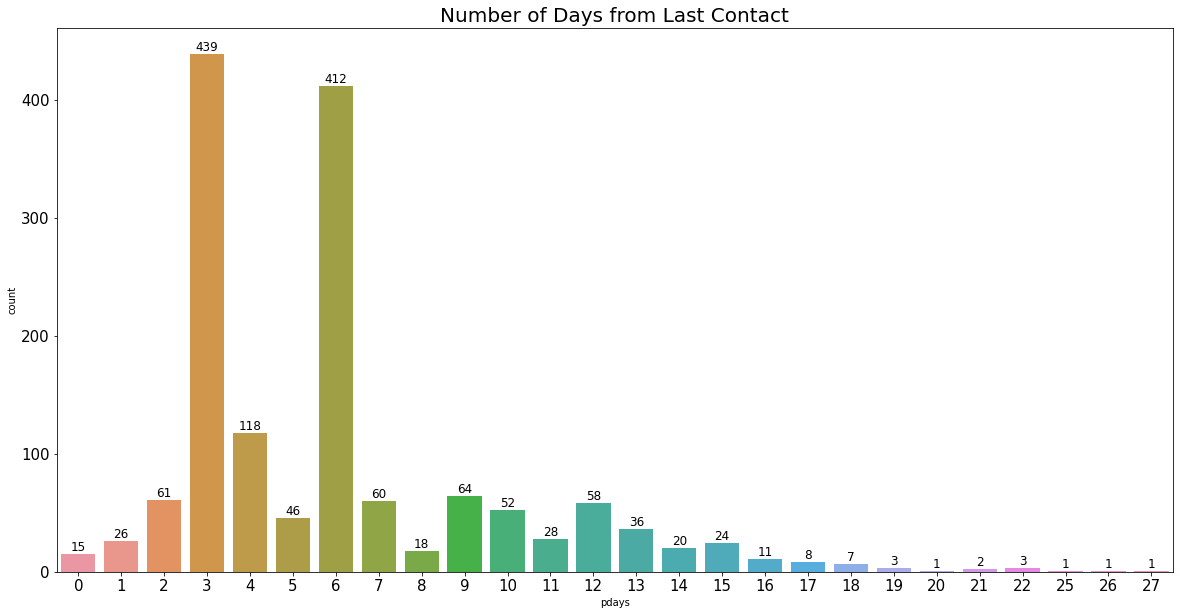

In [136]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x=df[df['pdays']!=999]['pdays'])
plt.title('Number of Days from Last Contact', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(int(y), (x.mean(), y), ha='center', va='bottom', size=12)
# plt.savefig('pdays.png', bbox_inches='tight')
plt.show()

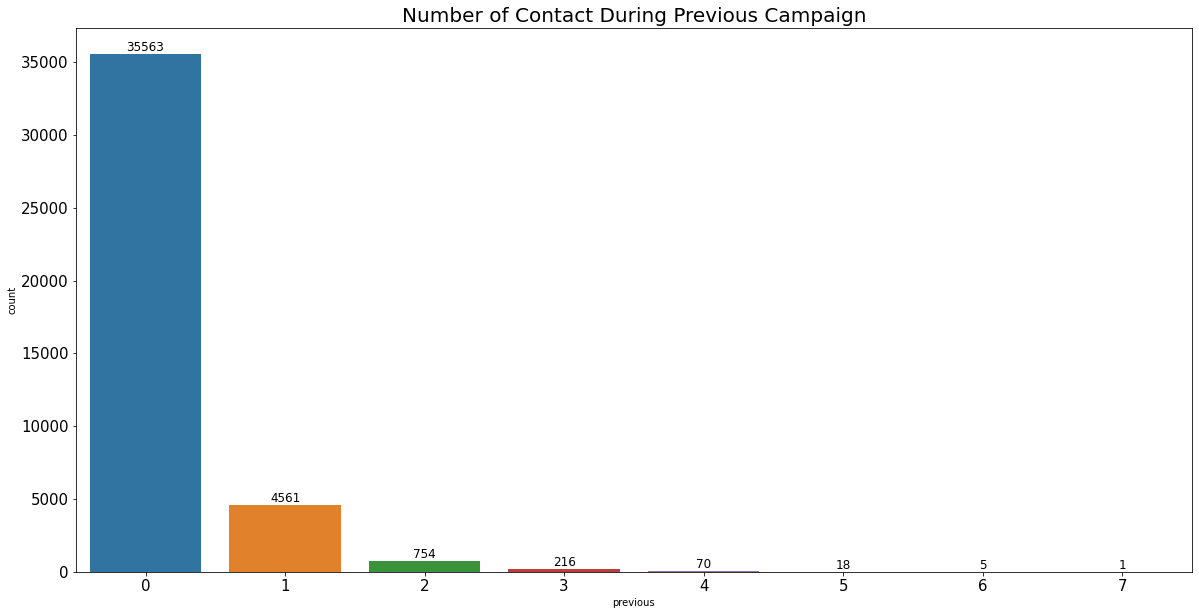

In [139]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x=df['previous'])
plt.title('Number of Contact During Previous Campaign', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(int(y), (x.mean(), y), ha='center', va='bottom', size=12)
# plt.savefig('previous.png', bbox_inches='tight')
plt.show()

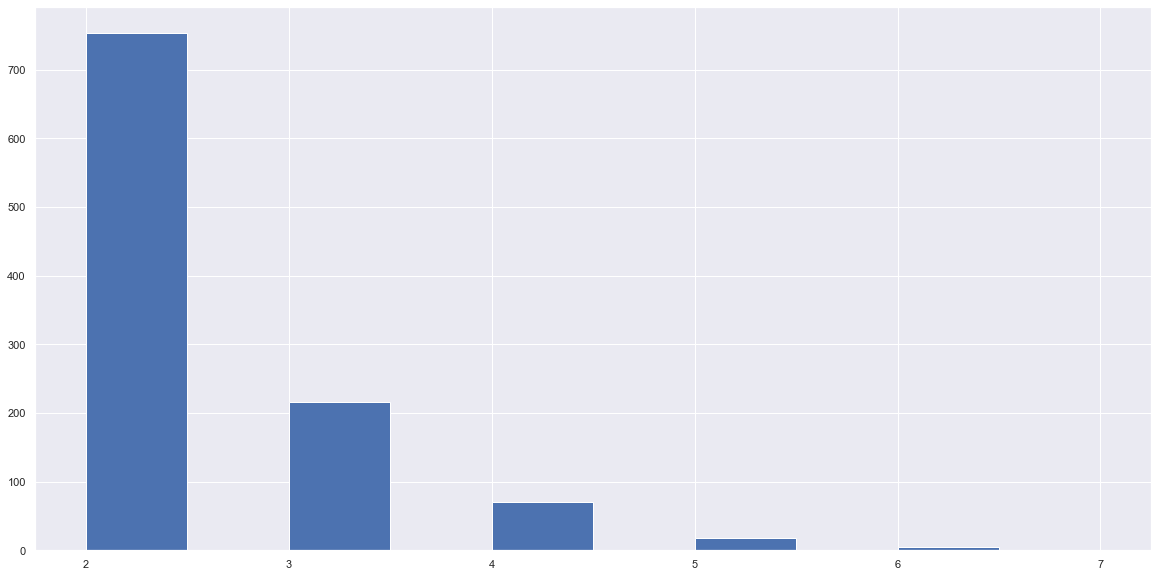

In [51]:
plt.figure(figsize=(20,10))
plt.hist(x=df[df['previous']>1]['previous'])

plt.show()

In [140]:
pout = pd.crosstab(index = df["poutcome"], columns = 'Sum')
pout['Persentase'] = ''
persen = []
for a in pout["Sum"]:
    persen.append(a/pout['Sum'].sum()*100)
pout['Persentase'] = persen
pout

col_0,Sum,Persentase
poutcome,,
failure,4252,10.323395
nonexistent,35563,86.343110
success,1373,3.333495


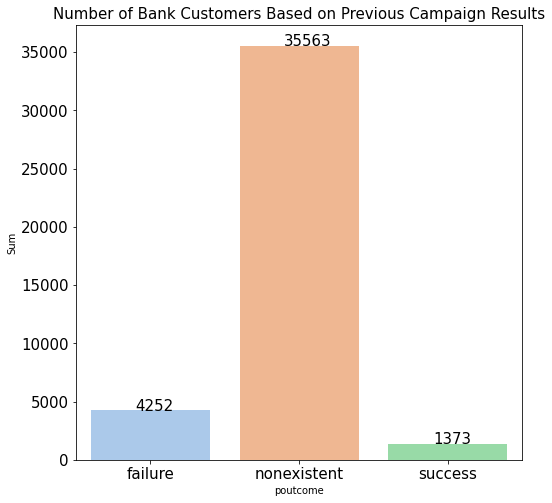

In [143]:
plt.figure(figsize=(8,8))
sns.barplot(data = pout.reset_index(), x='poutcome', y='Sum', palette='pastel')
plt.title("Number of Bank Customers Based on Previous Campaign Results", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
for b in pout.reset_index()['Sum']:
    plt.text(pout.reset_index()[pout.reset_index()['Sum'] == b].index[0]-.1, b, b, fontdict={'color' : 'black', 'size' : 15})
# plt.savefig('poutcome.png', bbox_inches='tight')
plt.show()

In [54]:
df['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

In [55]:
emp = pd.crosstab(index = df["emp.var.rate"], columns = 'Sum')
emp['Persentase'] = ''
persen = []
for a in emp["Sum"]:
    persen.append(a/emp['Sum'].sum()*100)
emp['Persentase'] = persen
emp

col_0,Sum,Persentase
emp.var.rate,,
-3.4,1071,2.600272
-3.0,172,0.417597
-2.9,1663,4.037584
-1.8,9184,22.297757
-1.7,773,1.876760
-1.1,635,1.541711
-0.2,10,0.024279
-0.1,3683,8.941925
1.1,7763,18.847723


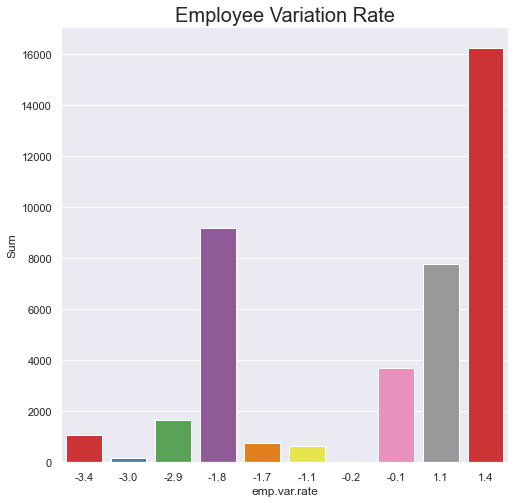

In [56]:
plt.figure(figsize=(8,8))
sns.barplot(data = emp.reset_index(), x='emp.var.rate', y='Sum', palette='Set1')
plt.title("Employee Variation Rate", size=20)
# plt.savefig('emp_var_rate.png', bbox_inches='tight')
plt.show()

In [57]:
cons = pd.crosstab(index = df["cons.price.idx"], columns = 'Sum')
cons['Persentase'] = ''
persen = []
for a in cons["Sum"]:
    persen.append(a/cons['Sum'].sum()*100)
cons['Persentase'] = persen
cons

col_0,Sum,Persentase
cons.price.idx,,
92.201,770,1.869477
92.379,267,0.648247
92.431,447,1.085268
92.469,178,0.432165
92.649,357,0.866757
92.713,172,0.417597
92.756,10,0.024279
92.843,282,0.684665
92.893,5794,14.067204


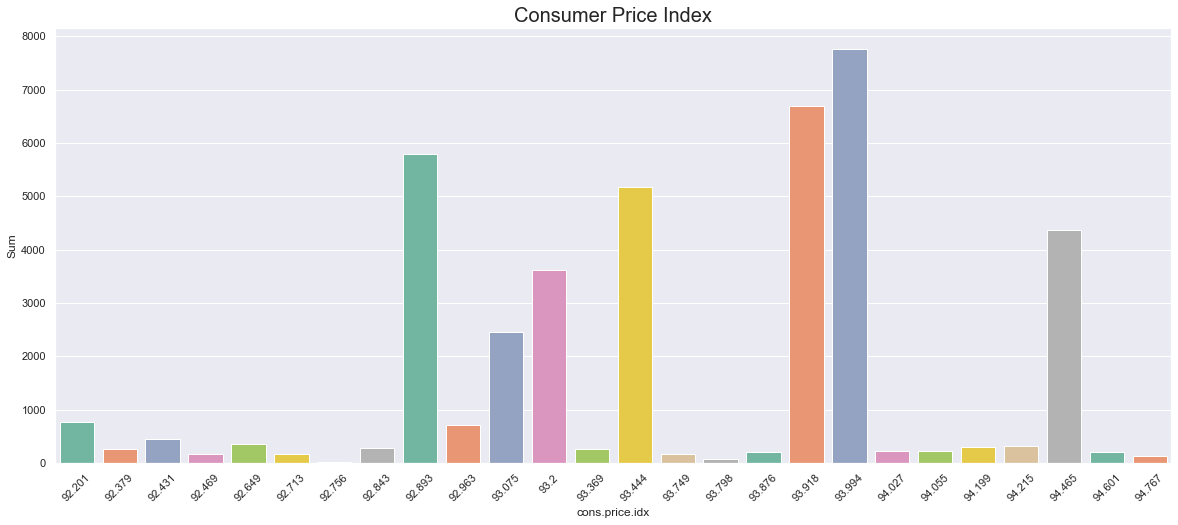

In [58]:
plt.figure(figsize=(20,8))
sns.barplot(data = cons.reset_index(), x='cons.price.idx', y='Sum', palette='Set2')
plt.title("Consumer Price Index", size=20)
plt.xticks(rotation=45)
# plt.savefig('cons_price_idx.png', bbox_inches='tight')
plt.show()

In [59]:
conf = pd.crosstab(index = df["cons.conf.idx"], columns = 'Sum')
conf['Persentase'] = ''
persen = []
for a in conf["Sum"]:
    persen.append(a/conf['Sum'].sum()*100)
conf['Persentase'] = persen
conf

col_0,Sum,Persentase
cons.conf.idx,,
-50.8,128,0.310770
-50.0,282,0.684665
-49.5,204,0.495290
-47.1,2458,5.967758
-46.2,5794,14.067204
-45.9,10,0.024279
-42.7,6685,16.230455
-42.0,3616,8.779256
-41.8,4374,10.619598


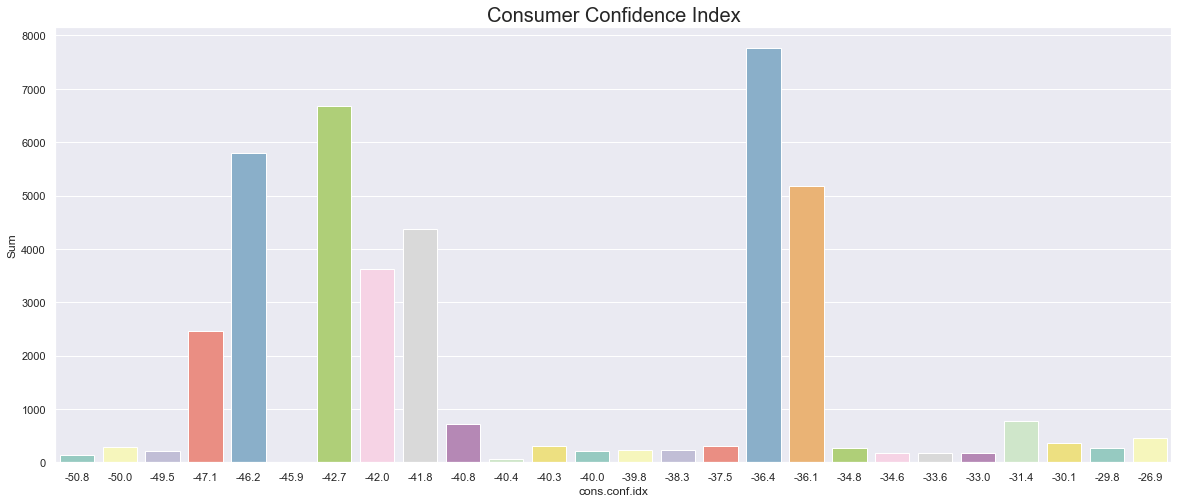

In [60]:
plt.figure(figsize=(20,8))
sns.barplot(data = conf.reset_index(), x='cons.conf.idx', y='Sum', palette='Set3')
plt.title("Consumer Confidence Index", size=20)
# plt.savefig('cons_conf_idx.png', bbox_inches='tight')
plt.show()

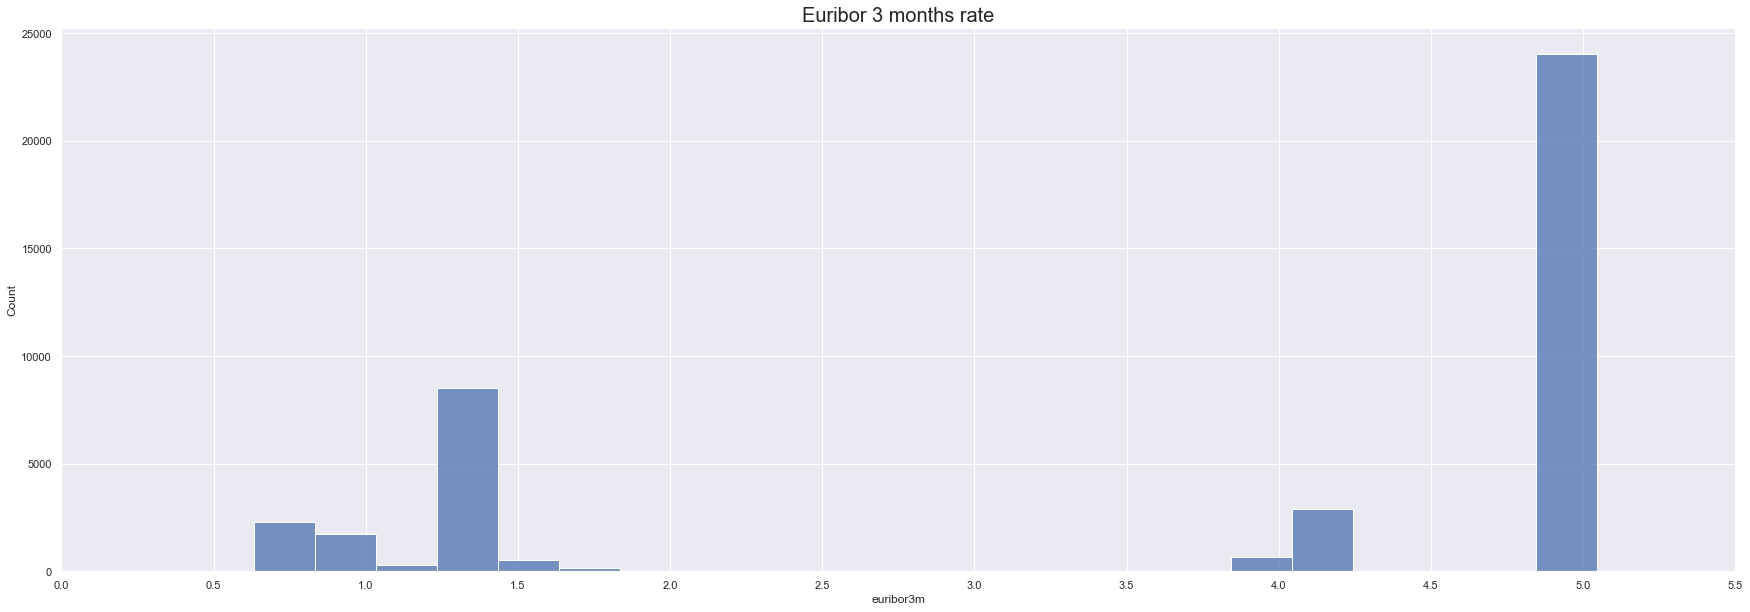

In [61]:
plt.figure(figsize=(30,10))
# sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(data=df, x='euribor3m')
plt.xticks(np.arange(0,6,0.5))
plt.title('Euribor 3 months rate', size=20)
# plt.savefig('euribor3m.png', bbox_inches='tight')
plt.show()

In [145]:
nr = pd.crosstab(index = df["nr.employed"], columns = 'Sum')
nr['Persentase'] = ''
persen = []
for a in nr["Sum"]:
    persen.append(a/nr['Sum'].sum()*100)
nr['Persentase'] = persen
nr

col_0,Sum,Persentase
nr.employed,,
4963.6,635,1.541711
4991.6,773,1.876760
5008.7,650,1.578130
5017.5,1071,2.600272
5023.5,172,0.417597
5076.2,1663,4.037584
5099.1,8534,20.719627
5176.3,10,0.024279
5191.0,7763,18.847723


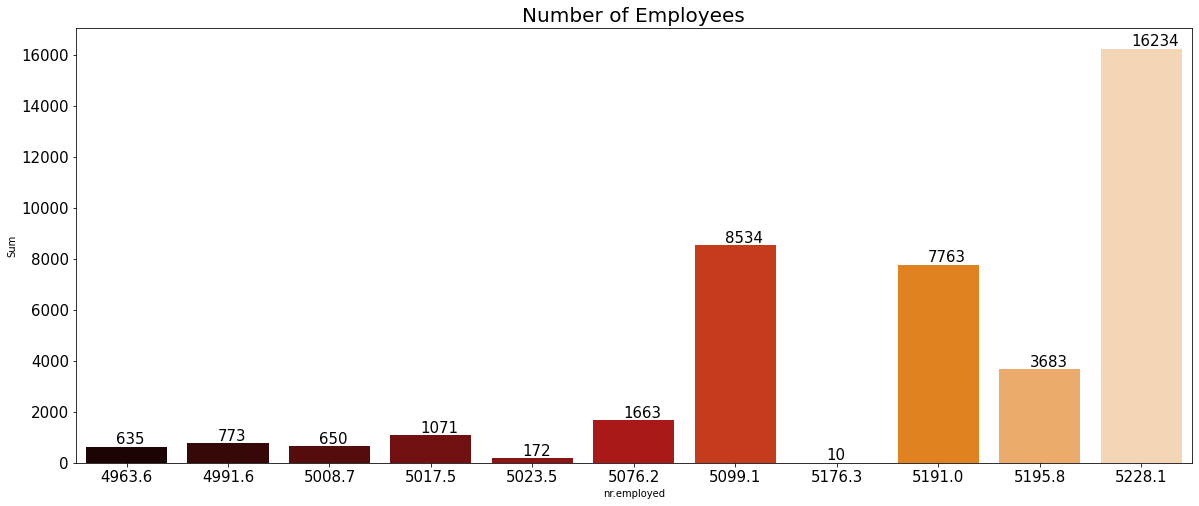

In [148]:
plt.figure(figsize=(20,8))
sns.barplot(data = nr.reset_index(), x='nr.employed', y='Sum', palette='gist_heat')
plt.title("Number of Employees", size=20)
plt.xticks(size=15)
plt.yticks(size=15)
for b in nr.reset_index()['Sum']:
    plt.text(nr.reset_index()[nr.reset_index()['Sum'] == b].index[0]-.1, b+100, b, fontdict={'color' : 'black', 'size' : 15})
# plt.savefig('nr_employee', bbox_inches='tight')
plt.show()

In [150]:
res = pd.crosstab(index = df["y"], columns = 'Sum')
res['Persentase'] = ''
persen = []
for a in res["Sum"]:
    persen.append(a/res['Sum'].sum()*100)
res['Persentase'] = persen
res

col_0,Sum,Persentase
y,,
no,36548,88.734583
yes,4640,11.265417


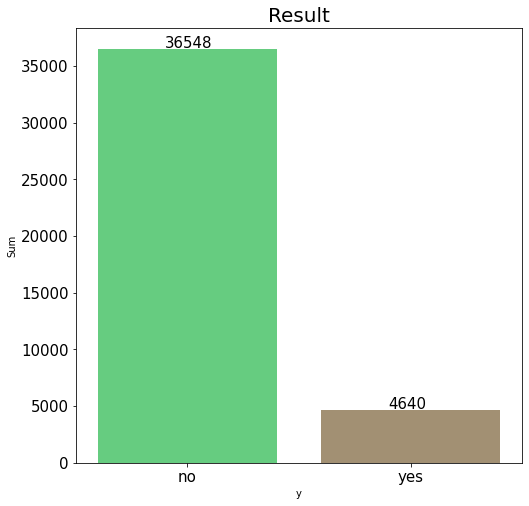

In [152]:
plt.figure(figsize=(8,8))
sns.barplot(data = res.reset_index(), x='y', y='Sum', palette='terrain')
plt.title("Result", size=20)
plt.xticks(size=15)
plt.yticks(size=15)
for b in res.reset_index()['Sum']:
    plt.text(res.reset_index()[res.reset_index()['Sum'] == b].index[0]-.1, b+100, b, fontdict={'color' : 'black', 'size' : 15})
# plt.savefig('y.png', bbox_inches='tight')
plt.show()

**Conclusion :**
- Age distribution forms a left-skewed bell with dominant age at 32 and dominant categorically in adult group
- Customers are dominated by group with type of work as admin
- Customers are dominated by group with marital status as married
- Customers are dominated by group with education level as a university degree
- Customers are dominated by group with no default status on credit cards
- Customers are dominated by group with communication methods using cellular
- Customers are dominated by group with last month contacted in May
- Customers are dominated by group with last weekday contacted in Thursday
- Duration distribution forms a left-skewed bell with dominant duration at 120 seconds and dominant categorically in 0 - 3 minutes
- Customers are dominated by group with many times of communication during the campaign as 1
- Customers are dominated by group without communication after the previous campaign
- Customers dominated by number of contacts group performed before this campaign as 0
- Customers are dominated by group with the outcome of previous marketing campaign as nonexistent
- Customers are dominated by group with employee variation rate as 1.4
- Customers are dominated by group with consumer price index as 93.994
- Customers are dominated by group with consumer confidence index as -36.4
- Customers are dominated by group with euribor 3 month rate as 5
- Customers are dominated by group with number of employees as 5228 workers
- Customers are dominated by group with has subscribed a term deposit status as no

# Multivariate Analysis

## Multivariate Analysis of Deposit Subscribed

#### Multivariate Analysis between age and y

In [66]:
(pd.crosstab(index = df['age_bin'], columns = df['y'], normalize = 'index')*100).round(2)

y,no,yes
age_bin,,
Teenager,59.29,40.71
Adult,88.73,11.27
Elder,88.98,11.02


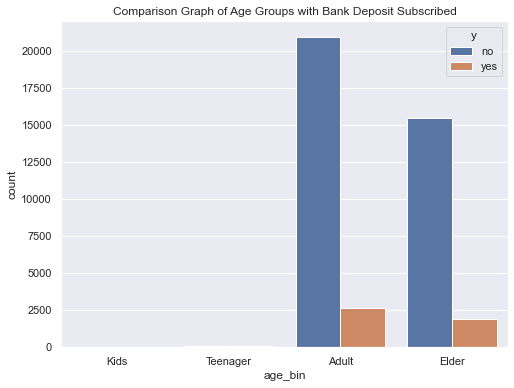

In [67]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'age_bin', data = df , hue = 'y')
plt.title('Comparison Graph of Age Groups with Bank Deposit Subscribed')
# plt.xticks(rotation=45)
plt.show()

Insight : The adult group dominates deposit subscribed in banks

#### Multivariate Analysis and Visualizing between job and y

In [68]:
(pd.crosstab(index = df['job'], columns = df['y'], normalize = 'index')*100).round(2).sort_values(by='yes', ascending=False)

y,no,yes
job,,
student,68.57,31.43
retired,74.77,25.23
unemployed,85.80,14.20
admin.,87.03,12.97
management,88.78,11.22
unknown,88.79,11.21
technician,89.17,10.83
self-employed,89.51,10.49
housemaid,90.00,10.00


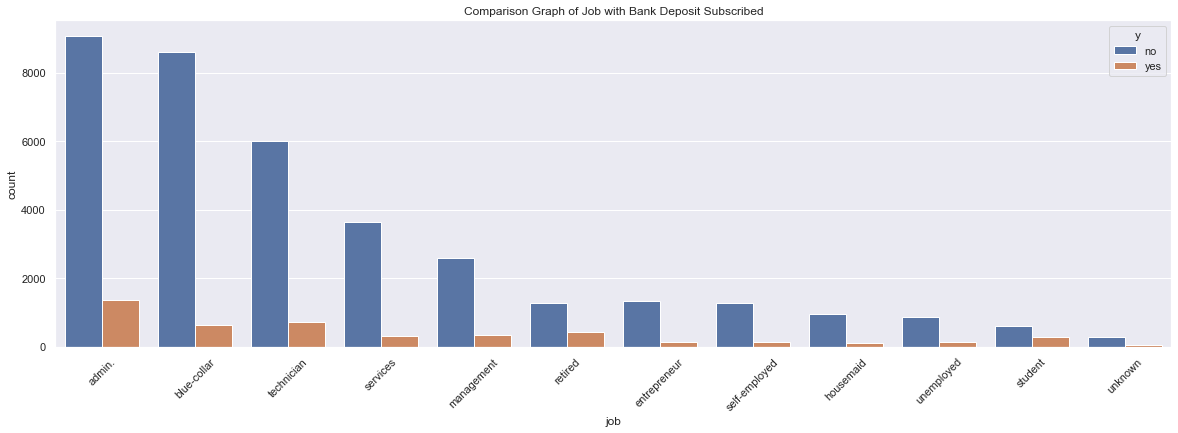

In [69]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'job', data = df , hue = 'y', order=df['job'].value_counts().index)
plt.title('Comparison Graph of Job with Bank Deposit Subscribed')
plt.xticks(rotation=45)
plt.show()

Insight : 

1. The admin job-group dominates deposit subscribed in banks by quantity
          
2. The student job-group has highest subscribe percentage

#### Multivariate Analysis and Visualizing between marital and y

In [70]:
(pd.crosstab(index = df['marital'], columns = df['y'], normalize = 'index')*100).round(2)

y,no,yes
marital,,
divorced,89.68,10.32
married,89.84,10.16
single,86.00,14.00
unknown,85.00,15.00


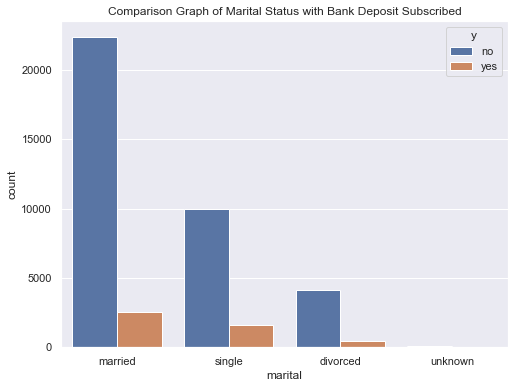

In [71]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'marital', data = df , hue = 'y')
plt.title('Comparison Graph of Marital Status with Bank Deposit Subscribed')
# plt.xticks(rotation=45)
plt.show()

Insight : 

1. The marital status as married dominates deposit subscribed in banks

2. Unknown marital status has the highest subscribe percentage

#### Multivariate Analysis and Visualizing between education and y

In [72]:
(pd.crosstab(index = df['education'], columns = df['y'], normalize = 'index')*100).round(2)

y,no,yes
education,,
basic 4y,89.75,10.25
basic 6y,91.80,8.20
basic 9y,92.18,7.82
high school,89.16,10.84
illiterate,77.78,22.22
professional course,88.65,11.35
university degree,86.28,13.72
unknown,85.50,14.50


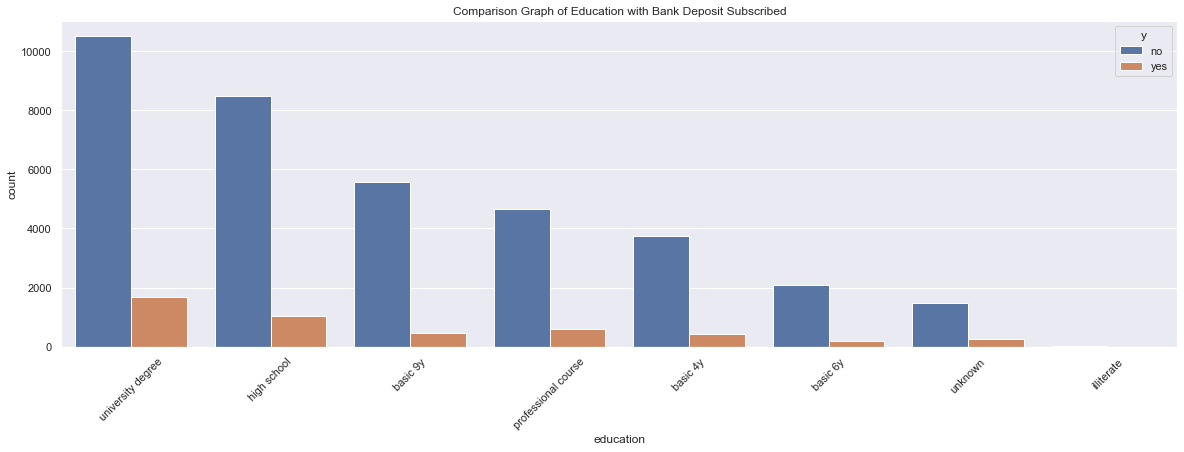

In [73]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'education', data = df , hue = 'y', order=df['education'].value_counts().index)
plt.title('Comparison Graph of Education with Bank Deposit Subscribed')
plt.xticks(rotation=45)
plt.show()

Insight : 

1. The education level as university degree dominates deposit subscribed in banks

2. Illiterate has the highest subscribe percentage but has the smallest quantity

#### Multivariate Analysis and Visualizing between default and y

In [74]:
(pd.crosstab(index = df['default'], columns = df['y'], normalize = 'index')*100).round(2)

y,no,yes
default,,
no,87.12,12.88
unknown,94.85,5.15
yes,100.00,0.00


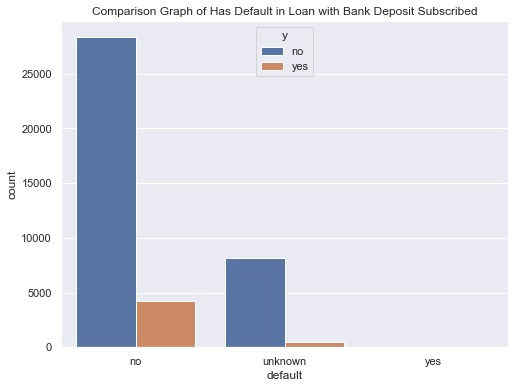

In [75]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'default', data = df , hue = 'y')
plt.title('Comparison Graph of Has Default in Loan with Bank Deposit Subscribed')
# plt.xticks(rotation=45)
plt.show()

Insight : Group which has no default loan dominates deposit subscribed in banks by quantity and percentage

#### Multivariate Analysis and Visualizing between housing and y

In [76]:
(pd.crosstab(index = df['housing'], columns = df['y'], normalize = 'index')*100).round(2)

y,no,yes
housing,,
no,89.12,10.88
unknown,89.19,10.81
yes,88.38,11.62


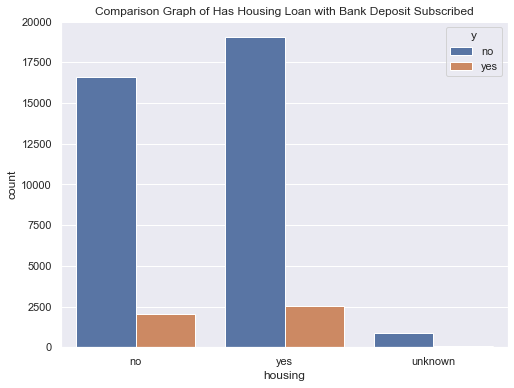

In [77]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'housing', data = df , hue = 'y')
plt.title('Comparison Graph of Has Housing Loan with Bank Deposit Subscribed')
# plt.xticks(rotation=45)
plt.show()

Insight : Group of clients which has housing loan dominates deposit subscribed in banks by quantity and percentage

#### Multivariate Analysis and Visualizing between loan and y

In [78]:
(pd.crosstab(index = df['loan'], columns = df['y'], normalize = 'index')*100).round(2)

y,no,yes
loan,,
no,88.66,11.34
unknown,89.19,10.81
yes,89.07,10.93


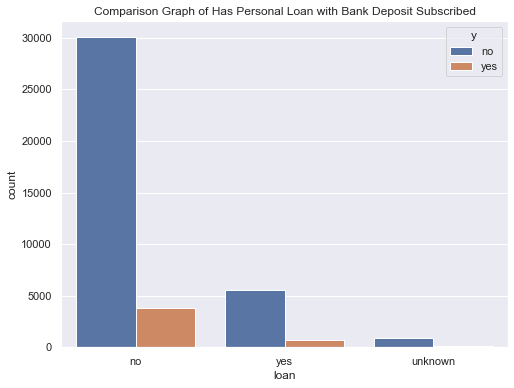

In [79]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'loan', data = df , hue = 'y')
plt.title('Comparison Graph of Has Personal Loan with Bank Deposit Subscribed')
# plt.xticks(rotation=45)
plt.show()

Insight : Group which has no personal loan dominates deposit subscribed in banks by quantity and percentage

#### Multivariate Analysis and Visualizing between contact and y

In [80]:
(pd.crosstab(index = df['contact'], columns = df['y'], normalize = 'index')*100).round(2)

y,no,yes
contact,,
cellular,85.26,14.74
telephone,94.77,5.23


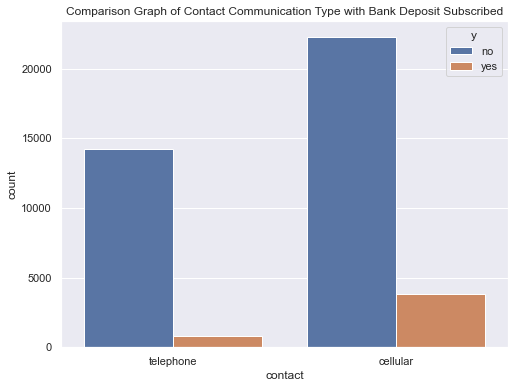

In [81]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'contact', data = df , hue = 'y')
plt.title('Comparison Graph of Contact Communication Type with Bank Deposit Subscribed')
# plt.xticks(rotation=45)
plt.show()

Insight : Group which contacted by cellular dominates deposit subscribed in banks by quantity and percentage

#### Multivariate Analysis and Visualizing between month and y

In [82]:
(pd.crosstab(index = df['month'], columns = df['y'], normalize = 'index')*100).round(2)

y,no,yes
month,,
mar,49.45,50.55
apr,79.52,20.48
may,93.57,6.43
jun,89.49,10.51
jul,90.95,9.05
aug,89.40,10.60
sep,55.09,44.91
oct,56.13,43.87
nov,89.86,10.14


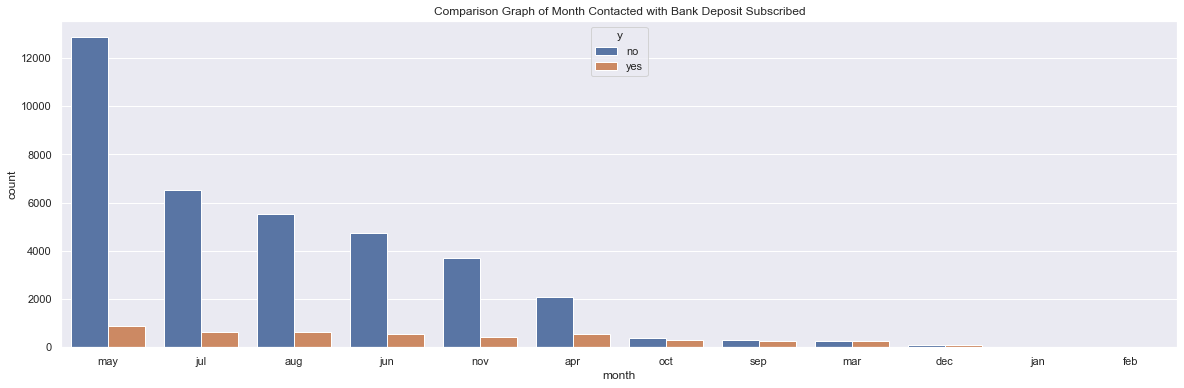

In [83]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'month', data = df , hue = 'y', order=df['month'].value_counts().index)
plt.title('Comparison Graph of Month Contacted with Bank Deposit Subscribed')
plt.show()

Insight 

1. Most customer was contacted in May and even though May has the lowest subscribe percentage, the quantity of deposit is the highest
2. Mar has the highest subscribe percentage but is the second lowest by quantity

#### Multivariate Analysis and Visualizing between day_of_week and y

In [84]:
(pd.crosstab(index = df['day_of_week'], columns = df['y'], normalize = 'index')*100).round(2)

y,no,yes
day_of_week,,
mon,90.05,9.95
tue,88.22,11.78
wed,88.33,11.67
thu,87.88,12.12
fri,89.19,10.81


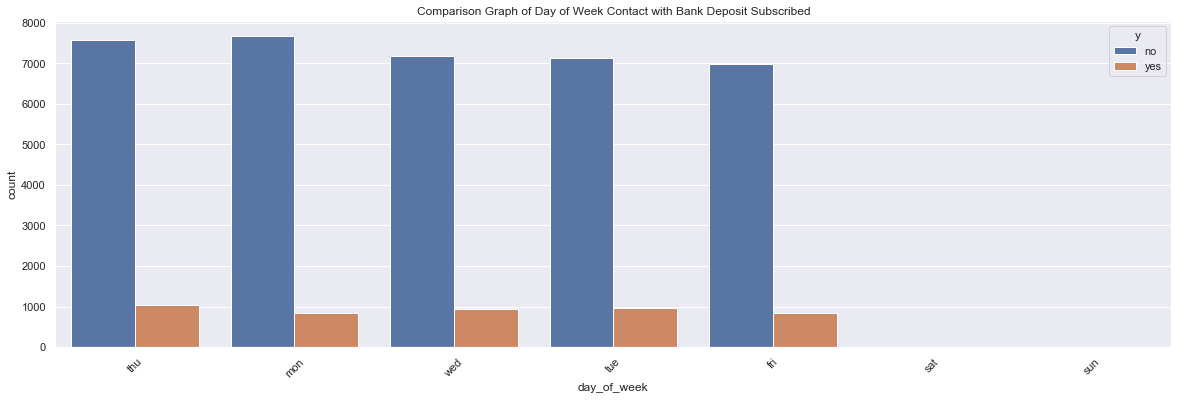

In [85]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'day_of_week', data = df , hue = 'y', order=df['day_of_week'].value_counts().index)
plt.title('Comparison Graph of Day of Week Contact with Bank Deposit Subscribed')
plt.xticks(rotation=45)
plt.show()

Insight : Last day of week communication between client and campaign team was dominated in Thursday

#### Multivariate Analysis and Visualizing between duration and y

In [86]:
(pd.crosstab(index = df['dur_bin'], columns = df['y'], normalize = 'index')*100).round(2)

y,no,yes
dur_bin,,
0-3 min,97.28,2.72
3-6 min,88.98,11.02
6-9 min,80.52,19.48
9-12 min,64.58,35.42
12-15 min,53.57,46.43
15-18 min,40.04,59.96
>18 min,41.11,58.89


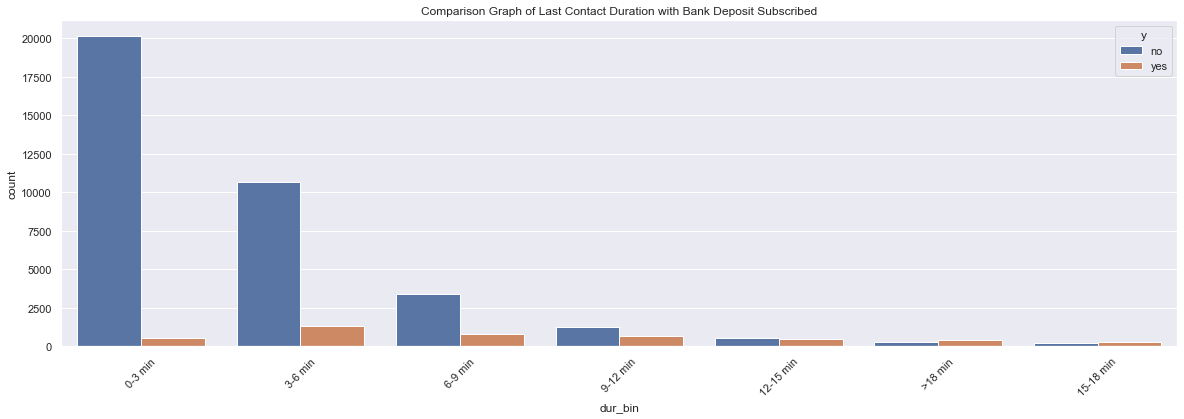

In [87]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'dur_bin', data = df , hue = 'y', order=df['dur_bin'].value_counts().index)
plt.title('Comparison Graph of Last Contact Duration with Bank Deposit Subscribed')
plt.xticks(rotation=45)
plt.show()

Insight : 

1. Last duration calls between bank customers and campaign by range 3 - 6 minutes has the highest deposit quantity

2. There is a trend that shows the longer the duration, the greater the chance for the customer to deposit

#### Multivariate Analysis and Visualizing between campaign and y

In [88]:
cam_bin = [0, 10, 20, 30, 40, 50, df['campaign'].max()] ## Membuat Kelompok Campaign
labels_campaign = ['0 - 10 times', '10 - 20 times', '20 - 30 times', '30 - 40 times', '40-50 times', 'more than 50 times'] ## Label untuk Kelompok Campaign
df['cam_bin'] = pd.cut(df['campaign'], bins=cam_bin, labels=labels_campaign)

In [89]:
(pd.crosstab(index = df['cam_bin'], columns = df['y'], normalize = 'index')*100).round(2)

y,no,yes
cam_bin,,
0 - 10 times,88.56,11.44
10 - 20 times,96.35,3.65
20 - 30 times,99.19,0.81
30 - 40 times,100.00,0.00
40-50 times,100.00,0.00
more than 50 times,100.00,0.00


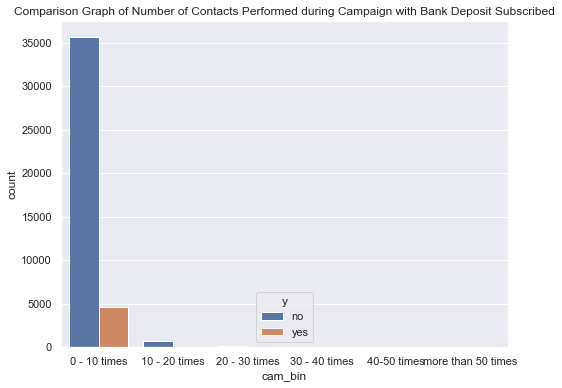

In [90]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'cam_bin', data = df , hue = 'y')
plt.title('Comparison Graph of Number of Contacts Performed during Campaign with Bank Deposit Subscribed')
# plt.xticks(rotation=45)
plt.show()

Insight : 

1. Number of calls between bank customers and campaign team was dominated by range 0 - 10 times

2. If the customer already contacted more that 10 times, the probabilty of deposit become slim to none

#### Multivariate Analysis and Visualizing between pdays and y

In [91]:
pdays_bin = [0, 10, 20, 30, df['pdays'].max()]
labels_pdays = ['0 - 10 days', '10 - 20 days', '20 - 30 days', 'no contact']
df['pdays_bin'] = pd.cut(df['pdays'], bins=pdays_bin, labels=labels_pdays)

In [92]:
(pd.crosstab(index = df['pdays_bin'], columns = df['y'], normalize = 'index')*100).round(2)

y,no,yes
pdays_bin,,
0 - 10 days,35.11,64.89
10 - 20 days,44.39,55.61
20 - 30 days,12.50,87.50
no contact,90.74,9.26


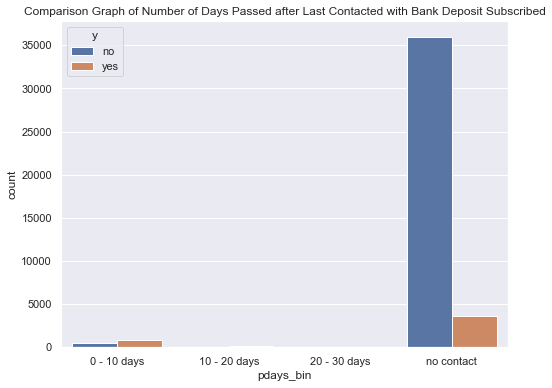

In [93]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'pdays_bin', data = df , hue = 'y')
plt.title('Comparison Graph of Number of Days Passed after Last Contacted with Bank Deposit Subscribed')
# plt.xticks(rotation=45)
plt.show()

Insight : 

1. Clients who choose to subscribe deposits are dominated by who were not contacted from the previous campaign

2. If the customer has been contacted in the previous campaign, there is higher chance that they will deposit

#### Multivariate Analysis and Visualizing between previous and y

In [94]:
(pd.crosstab(index = df['previous'], columns = df['y'], normalize = 'index')*100).round(2)

y,no,yes
previous,,
0,91.17,8.83
1,78.80,21.20
2,53.58,46.42
3,40.74,59.26
4,45.71,54.29
5,27.78,72.22
6,40.00,60.00
7,100.00,0.00


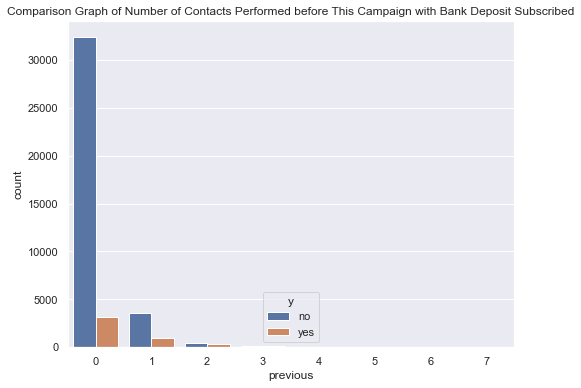

In [95]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'previous', data = df , hue = 'y')
plt.title('Comparison Graph of Number of Contacts Performed before This Campaign with Bank Deposit Subscribed')
# plt.xticks(rotation=45)
plt.show()

Insight : 

1. Clients who choose to subscribe deposits are dominated by clients who were not contacted from the previous campaign

2. If the customer was contacted between 2 - 7 times in the previous campaign, there is higher chance that they will subscribe

#### Multivariate Analysis and Visualizing between poutcome and y

In [96]:
(pd.crosstab(index = df['poutcome'], columns = df['y'], normalize = 'index')*100).round(2)

y,no,yes
poutcome,,
failure,85.77,14.23
nonexistent,91.17,8.83
success,34.89,65.11


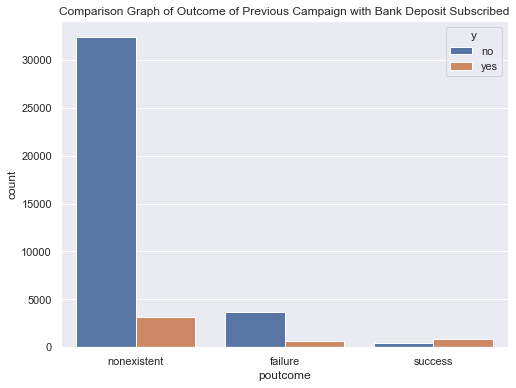

In [97]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'poutcome', data = df , hue = 'y')
plt.title('Comparison Graph of Outcome of Previous Campaign with Bank Deposit Subscribed')
# plt.xticks(rotation=45)
plt.show()

Insight : 

1. Clients who choose to subscribe deposits are dominated by clients whose previous outcome of campaign were nonexistent

2. Customer who subscribe at the previous campaign highest subscribe percentage in the current campaign

#### Multivariate Analysis and Visualizing between emp.var.rate and y

In [98]:
(pd.crosstab(index = df['emp.var.rate'], columns = df['y'], normalize = 'index')*100).round(2)

y,no,yes
emp.var.rate,,
-3.4,57.61,42.39
-3.0,48.84,51.16
-2.9,64.28,35.72
-1.8,84.09,15.91
-1.7,47.87,52.13
-1.1,52.60,47.40
-0.2,90.00,10.00
-0.1,93.70,6.30
1.1,96.91,3.09


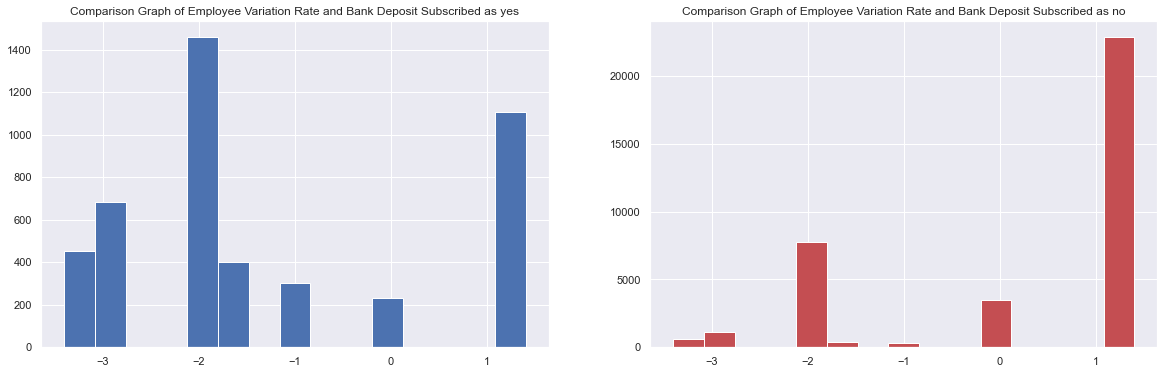

In [99]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.hist(x = df[df['y']=='yes']['emp.var.rate'],bins=15)
plt.title('Comparison Graph of Employee Variation Rate and Bank Deposit Subscribed as yes')
# plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.hist(x = df[df['y']=='no']['emp.var.rate'],color='r',bins=15)
plt.title('Comparison Graph of Employee Variation Rate and Bank Deposit Subscribed as no')
# plt.xticks(rotation=45)
plt.show()

Insight : 

1. Clients who choose to subscribe deposits are dominated by clients whose employee variation rate as -1.8

2. There is a trend that shows if the employee variation rate become better (less negative or more positive), the subscribe percentage become lower

#### Multivariate Analysis and Visualizing between cons.price.idx and y

In [100]:
(pd.crosstab(index = df['cons.price.idx'], columns = df['y'], normalize = 'index')*100).round(2)

y,no,yes
cons.price.idx,,
92.201,65.71,34.29
92.379,60.30,39.70
92.431,59.73,40.27
92.469,62.92,37.08
92.649,52.94,47.06
92.713,48.84,51.16
92.756,90.00,10.00
92.843,55.32,44.68
92.893,90.96,9.04


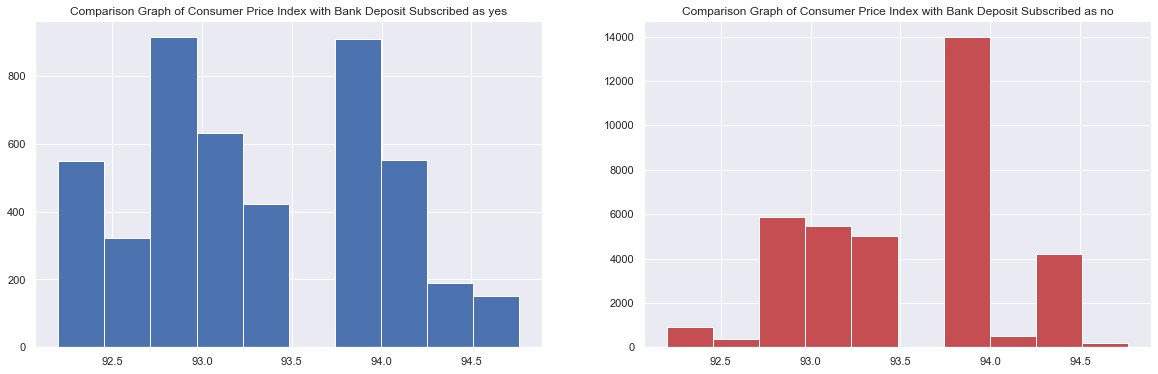

In [101]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.hist(x = df[df['y']=='yes']['cons.price.idx'])
plt.title('Comparison Graph of Consumer Price Index with Bank Deposit Subscribed as yes')
plt.subplot(1,2,2)
plt.hist(x = df[df['y']=='no']['cons.price.idx'], color='r')
plt.title('Comparison Graph of Consumer Price Index with Bank Deposit Subscribed as no')

# plt.xticks(rotation=45)
plt.show()

Insight : Client who choose to subscribe are dominated by clients whose consumer price index was 92.893

#### Multivariate Analysis and Visualizing between cons.conf.idx and y

In [102]:
# Analisis Multivariate antara cons.conf.idx dan y
(pd.crosstab(index = df['cons.conf.idx'], columns = df['y'], normalize = 'index')*100).round(2)

y,no,yes
cons.conf.idx,,
-50.8,54.69,45.31
-50.0,55.32,44.68
-49.5,54.41,45.59
-47.1,82.02,17.98
-46.2,90.96,9.04
-45.9,90.00,10.00
-42.7,93.91,6.09
-42.0,94.75,5.25
-41.8,95.70,4.30


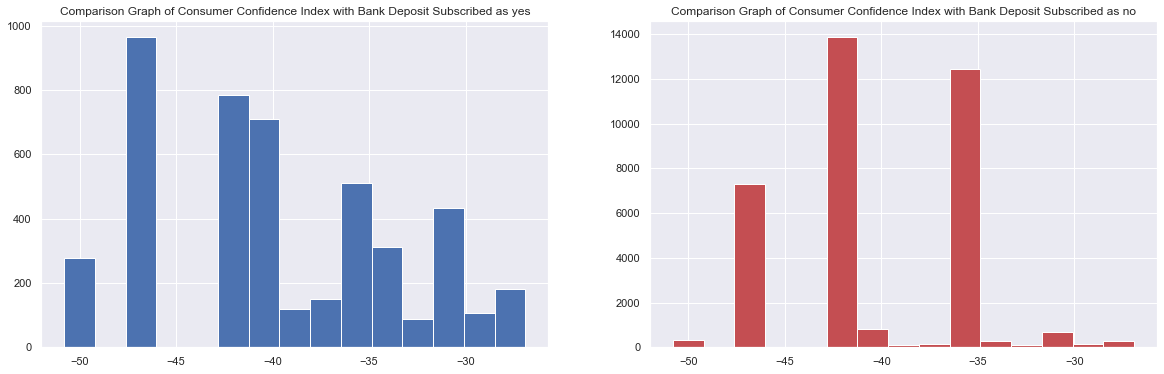

In [103]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.hist(x = df[df['y']=='yes']['cons.conf.idx'],bins=15)
plt.title('Comparison Graph of Consumer Confidence Index with Bank Deposit Subscribed as yes')
plt.subplot(1,2,2)
plt.hist(x = df[df['y']=='no']['cons.conf.idx'],color='r',bins=15)
plt.title('Comparison Graph of Consumer Confidence Index with Bank Deposit Subscribed as no')

# plt.xticks(rotation=45)
plt.show()

Insight : Clients who choose to subscribe deposits are dominated by clients whose consumer confidence index as -46.2

#### Multivariate Analysis and Visualizing between euribor3m and y

In [104]:
eur_bin = [0, 1, 2, 3, 4, df['pdays'].max()]
labels_eur = ['0 - 1', '1 - 2', '2 - 3', '3 - 4', '>4']
df['eur_bin'] = pd.cut(df['euribor3m'], bins=eur_bin, labels=labels_eur)

In [105]:
(pd.crosstab(index = df['eur_bin'], columns = df['y'], normalize = 'index')*100).round(2)

y,no,yes
eur_bin,,
0 - 1,54.30,45.70
1 - 2,84.20,15.80
3 - 4,92.86,7.14
>4,95.17,4.83


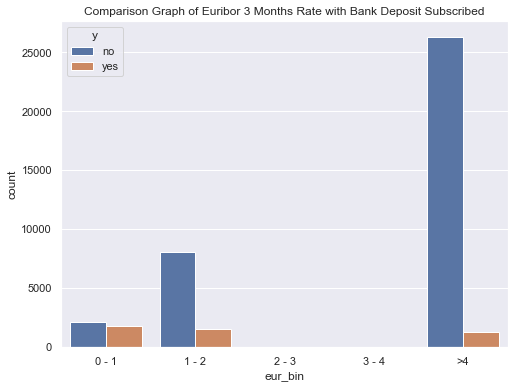

In [106]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'eur_bin', data = df , hue = 'y')
plt.title('Comparison Graph of Euribor 3 Months Rate with Bank Deposit Subscribed')
# plt.xticks(rotation=45)
plt.show()

Insight : 

1. Clients who choose to subscribe deposits are dominated by clients whose euribor 3 months rate in range 0 - 1 by quantity

2. If euribor become higher then subscribe percentage become lower

#### Multivariate Analysis and Visualizing between nr.employed and y

In [107]:
(pd.crosstab(index = df['nr.employed'], columns = df['y'], normalize = 'index')*100).round(2)

y,no,yes
nr.employed,,
4963.6,52.60,47.40
4991.6,47.87,52.13
5008.7,43.23,56.77
5017.5,57.61,42.39
5023.5,48.84,51.16
5076.2,64.28,35.72
5099.1,87.20,12.80
5176.3,90.00,10.00
5191.0,96.91,3.09


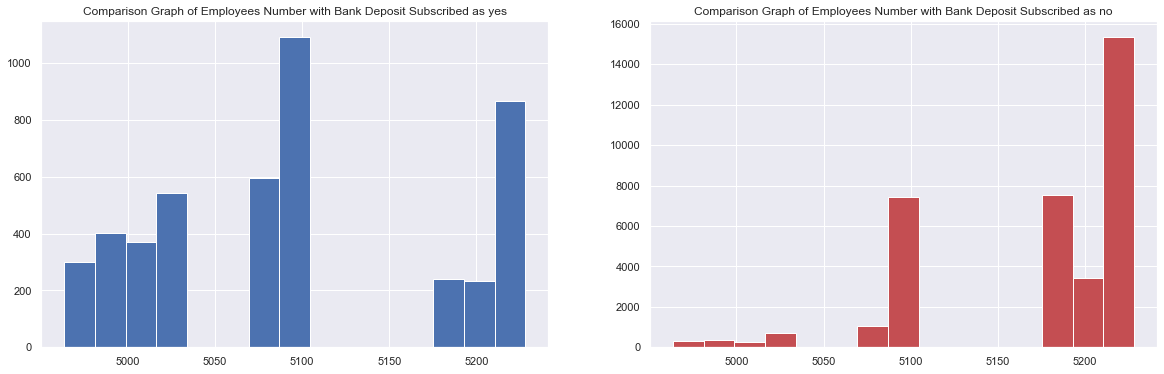

In [108]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.hist(x = df[df['y']=='yes']['nr.employed'],bins=15)
plt.title('Comparison Graph of Employees Number with Bank Deposit Subscribed as yes')
plt.subplot(1,2,2)
plt.hist(x = df[df['y']=='no']['nr.employed'],color='r',bins=15)
plt.title('Comparison Graph of Employees Number with Bank Deposit Subscribed as no')

# plt.xticks(rotation=45)
plt.show()

Insight : 

1. Clients who choose to subscribe deposits are dominated by clients whose number of employee at 5228 workers

2. If number of employee becomes higher then subscribe percentage becomes lower

**Conclusion :**
- The adult group dominates deposit subscribed in banks
- The admin job-group dominates deposit subscribed in banks but the student group has the highest subscribe percentage
- The marital status as married dominates deposit subscribed in banks but single has the second highest subscribe percentage (the highest is unknown but the quantity is scarce)
- The education level as university degree dominates deposit subscribed in banks but the unknown has the highest subscribe percentage (the highest is illiterate but the quantity is scarce
- Group which has no default loan dominates deposit subscribed in banks and has the highest percentage
- Group of clients which has housing loan dominates deposit subscribed in banks and has the highest percentage
- Group which has no personal loan dominates deposit subscribed in banks and has the highest percentage
- Group which contacted by cellular dominates deposit subscribed in banks and has the highest percentage
- Last month communication between client and campaign team was dominated in May by quantity, but March has the highest percentage
- Last day of week communication between client and campaign team was dominated by Thursday and has the highest percentage
- Last duration calls between bank customers and campaign team was dominated by range 3 - 6 minutes, longer duration has greater chance for the customer to subscribe
- Number of calls between bank customers and campaign team was dominated by range 0 - 10 times and if the customer already contacted more than 10 times then the customer is less likely to deposit
- Clients who choose to subscribe deposits are dominated by who were not contacted from the previous campaign but if they were contacted during previous campaign between 2 - 7 times then there is higher chance
- Clients who choose to subscribe deposits are dominated by clients whose previous outcome of campaign were nonexistent, but if they subsribed at the previous campaign then they will likely to subscribe again
- Clients who choose to subscribe deposits are dominated by clients whose employee variation rate as -1.8 and if it becomes less negative or more positive then subscribe percentage becomes lower
- Client who choose to subscribe are dominated by clients whose consumer price index was 92.893
- Clients who choose to subscribe deposits are dominated by clients whose consumer confidence index as -46.2
- Clients who choose to subscribe deposits are dominated by clients whose euribor 3 months rate in range 0 - 1 and if euribor rate becomes higher then subscriber percentage become lower
- Clients who choose to subscribe deposits are dominated by clients whose number of employee at 5228 workers